In [1]:
import networkx as nx
import random
import itertools
import numpy as np
import pandas as pd
from collections import Counter


import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from IPython.display import display, Image, HTML
import sys, os
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

print(sys.path)
import repository

['/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/tomk/environment/devpy/lib/python3.10/site-packages', '/home/tomk/Documents/Coding/gitHub/daglit/src', '/home/tomk/Documents/Coding/gitHub/datamodels/src']
Serialization.Meta [Serialization.SerializationMetaData]
Serialization.Serialization [Serialization.SerializationSpecs]
Serialization.Mapping [Serialization.SerializationSpecs]
Serialization.TranslationMapping [Serialization.SerializationSpecs]
Serialization.MappingKVPair [Serialization.SerializationSpecs]
Serialization.MetaClass [Serialization.Meta]
Serialization.MetaDataProperty [Serialization.Meta]
Serialization.MetaProperty [Serialization.Meta]
Serialization.MetaStaticProperty [Serialization.Meta]
Serialization.BatchDefinition [Serialization.SerializationSpecs]
Serialization.SerializationSpecs [Serialization.SerializationMetaData]
Serialization.BatchNode [Serialization.DataLoad]
Serialization.DataLoad [Serialization.SerializationMetaD

* Owlready2 * WARNING: ObjectProperty http://www.tkltd.org/ontologies/serialization#MappingMetaTarget belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, owl.topObjectProperty]; I'm trying to fix it...
* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /home/tomk/environment/devpy/lib/python3.10/site-packages/owlready2/hermit:/home/tomk/environment/devpy/lib/python3.10/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpxo3_vxy0
* Owlready2 * HermiT took 0.6209306716918945 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [3]:
import graphviz
from urllib.parse import urlparse
from itertools import product
import base64

In [4]:
from rdflib import URIRef, Graph, Namespace, Literal
from rdflib.query import Result
import pandas as pd
import re

store_type="jena"
#store_type="memory"
repo = repository.Repository(store_type=store_type)


In [45]:
import copy

In [8]:
#pmi_claims = http://www.tkltd.org/graphs/15fa679d4dbc46bf8a3b0289ab611aaa	
graph_call_sparql_p = """SELECT ?s ?p ?o
FROM <{graph}>
WHERE {{ ?s ?p ?o.}}"""
graph_url_string='http://www.tkltd.org/graphs/5e3007eb90564c53a998ea58a3eee018'
g_sparql = graph_call_sparql_p.format(graph=graph_url_string)

In [11]:
rs=repo.ds.query(g_sparql)
results_df = pd.DataFrame([r for r in rs])
results_df.columns=['s','p','o']
results_df

,s,p,o
0,http://www.tkltd.org/ontologies/636492c0bb2b40...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.tkltd.org/ontologies/datamodel#Attr...
1,http://www.tkltd.org/ontologies/636492c0bb2b40...,http://www.w3.org/2000/01/rdf-schema#label,treatment_unit_select_status_code
2,http://www.tkltd.org/ontologies/636492c0bb2b40...,http://www.tkltd.org/ontologies/serialization#...,Health.Postgres Mart.pmi_claims.treatment_unit...
3,http://www.tkltd.org/ontologies/9805f2f691f44d...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.tkltd.org/ontologies/datamodel#Class
4,http://www.tkltd.org/ontologies/9805f2f691f44d...,http://www.w3.org/2000/01/rdf-schema#label,pmi_claims
...,...,...,...
3580,http://www.tkltd.org/ontologies/4f1d402314ed4f...,http://www.tkltd.org/ontologies/serialization#...,MAX
3581,http://www.tkltd.org/graphs/5e3007eb90564c53a9...,http://purl.org/dc/elements/1.1/created,2024-04-24T17:09
3582,http://www.tkltd.org/graphs/5e3007eb90564c53a9...,http://purl.org/dc/elements/1.1/description,test
3583,http://www.tkltd.org/graphs/5e3007eb90564c53a9...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.tkltd.org/ontologies/graphs#UserGraph


In [12]:
set(results_df['p'].values)

{rdflib.term.URIRef('http://purl.org/dc/elements/1.1/created'),
 rdflib.term.URIRef('http://purl.org/dc/elements/1.1/description'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#Applies'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#MappingContainsDetail'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#MappingDetailSource'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#MappingDetailTarget'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#MappingSourceModel'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#MappingTargetModel'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#Sequence'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#ClassContainsAttribute'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#Contains'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/serialization#UniqueIdentifier'),
 rdflib.term.URIRef('htt

In [13]:
set(results_df[results_df['p']==URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type')]['o'].values)

{rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#DataMapping'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#DataMappingDetail'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#Translation'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#Attribute'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#Class'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#Model'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#ModelDomain'),
 rdflib.term.URIRef('http://www.tkltd.org/ontologies/graphs#UserGraph')}

In [14]:
sparql_folder = "../flask-app/ui_sparql/"

In [15]:
def get_sparql(filename):
    with open(os.path.join(sparql_folder,filename)) as sparqlf:
        sparql_text = sparqlf.read()
    return sparql_text

def process_data(graphname=None):
    q=get_sparql("graph_contents_by_graph.fsparql")
    qr = repo.run_adhoc_query (q.format(graph=graphname), native_rdflib=True)
    g=Graph()
    for row in qr:
        g.add((row['s'], row['p'], row['o']))
    return g

In [16]:
graph_url_string='http://www.tkltd.org/graphs/af61d0ea4b2f4ade88ae3c17ef9f71f5' # Staff Sales
graph_url_string='http://www.tkltd.org/graphs/5e3007eb90564c53a998ea58a3eee018' # pmi_claims

In [17]:
g=process_data(graph_url_string)

In [18]:
from qt_utils import qt_dict

In [19]:
import visualise_erd

In [20]:
nodes, _ = visualise_erd.collate_node_and_edge_features(g)

In [21]:
q_mapping_template={ "self" : "PARAMETER(@selfuri)",
    "contents" : {  "label" : "SPARQL(SELECT ?label WHERE {@selfuri <http://www.w3.org/2000/01/rdf-schema#label> ?label})", 
                    "type" : "SPARQL(SELECT ?type WHERE {@selfuri <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?type})",
                    "description" : "SPARQL(SELECT ?description WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#Description> ?description})",
                    "identifier" : "SPARQL(SELECT ?identifier WHERE {@selfuri <http://www.tkltd.org/ontologies/serialization#UniqueIdentifier> ?identifier})",
                    "fromclass" : "SPARQL(SELECT ?fclass WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailSource> ?fclass. ?fclass <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Class>})",
                    "toclass" : "SPARQL(SELECT ?tclass WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailTarget> ?tclass. ?tclass <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Class>})",
                    "fromattribute" : "SPARQL(SELECT ?fattr WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailSource> ?fattr. ?fattr <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Attribute>})",
                    "toattribute" : "SPARQL(SELECT ?tattr WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailTarget> ?tattr. ?tattr <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Attribute>})",
                    "function" : "SPARQL(SELECT ?function WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#Applies> ?f. ?f <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamapping#Translation>. ?f <http://www.w3.org/2000/01/rdf-schema#label> ?function.})",

                  

                    }
}

In [85]:
def collate_mapping_details(graph):

    #nodes, relations = visualise_erd.collate_node_and_edge_features(graph)
    rdftype_uriref=URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type')
    q_mapping_template={ "self" : "PARAMETER(@selfuri)",
    "contents" : {  "label" : "SPARQL(SELECT ?label WHERE {@selfuri <http://www.w3.org/2000/01/rdf-schema#label> ?label})", 
                    "type" : "SPARQL(SELECT ?type WHERE {@selfuri <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?type})",
                    "description" : "SPARQL(SELECT ?description WHERE {@selfuri <http://www.tkltd.org/ontologies/datamodel#Description> ?description})",
                    "identifier" : "SPARQL(SELECT ?identifier WHERE {@selfuri <http://www.tkltd.org/ontologies/serialization#UniqueIdentifier> ?identifier})",
                    "fromclass" : "SPARQL(SELECT ?fclass WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailSource> ?fclass. ?fclass <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Class>})",
                    "toclass" : "SPARQL(SELECT ?tclass WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailTarget> ?tclass. ?tclass <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Class>})",
                    "fromattribute" : "SPARQL(SELECT ?fattr WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailSource> ?fattr. ?fattr <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Attribute>})",
                    "toattribute" : "SPARQL(SELECT ?tattr WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailTarget> ?tattr. ?tattr <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Attribute>})",
                    "fromattributelabel" : "SPARQL(select (CONCAT(?class_ident,\",\",?attribute_label ) AS ?class_attribute_tuple) WHERE { @selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailSource> ?attribute. ?attribute a <http://www.tkltd.org/ontologies/datamodel#Attribute>. ?attribute rdfs:label ?attribute_label. ?attribute ^<http://www.tkltd.org/ontologies/datamodel#ClassContainsAttribute> ?class. ?class <http://www.tkltd.org/ontologies/serialization#UniqueIdentifier> ?class_ident.})",
                    "toattributelabel" : "SPARQL(select (CONCAT(?class_ident,\",\",?attribute_label ) AS ?class_attribute_tuple) WHERE { @selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailTarget> ?attribute. ?attribute a <http://www.tkltd.org/ontologies/datamodel#Attribute>. ?attribute rdfs:label ?attribute_label. ?attribute ^<http://www.tkltd.org/ontologies/datamodel#ClassContainsAttribute> ?class. ?class <http://www.tkltd.org/ontologies/serialization#UniqueIdentifier> ?class_ident.})",
                    "function" : "SPARQL(SELECT ?function WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#Applies> ?f. ?f <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamapping#Translation>. ?f <http://www.w3.org/2000/01/rdf-schema#label> ?function.})",
                    "sequence" : "SPARQL(SELECT ?sequence WHERE {@selfuri <http://www.tkltd.org/ontologies/datamapping#Sequence> ?sequence})",
                    "parent_mapping" : "SPARQL(SELECT ?parent_mapping WHERE {@selfuri ^<http://www.tkltd.org/ontologies/datamapping#MappingContainsDetail> ?parent_mapping})",

                    }
    }
    m_details=[]

    for s,p,o in graph.triples((None, rdftype_uriref, URIRef('http://www.tkltd.org/ontologies/datamapping#DataMappingDetail'))):
        m_details.append(s)

    m_dict = qt_dict(g, q_mapping_template, {"@selfuri" : m_details}, scope=None)

    return m_dict

In [86]:
def resolve_minimum_mapping_sequence_per_attribute(mapping_dict):
    attribute_sequences=dict()
    
    for mapping_key, mapping_detail in mapping_dict.items():
        for attribute in mapping_detail['fromattribute']:
            if attribute not in attribute_sequences.keys():
                attribute_sequences[attribute]=min(mapping_detail['sequence']).toPython()
        for attribute in mapping_detail['toattribute']:
            if attribute not in attribute_sequences.keys():
                attribute_sequences[attribute]=min(mapping_detail['sequence']).toPython()
    return attribute_sequences
                
        
    

In [87]:
m_dict=collate_mapping_details(g)
m_dict

{rdflib.term.URIRef('http://www.tkltd.org/ontologies/629eea2d951b47629cecbceec7d5e705'): {'label': [rdflib.term.Literal('pmi_claims_mart.None.pmi_claims.main_cond_last_advice_yearmonth')],
  'type': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#DataMappingDetail')],
  'description': [],
  'identifier': [rdflib.term.Literal('pmi_claims_mart.None.pmi_claims.main_cond_last_advice_yearmonth')],
  'fromclass': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/d478526cf9ad4cddb85b18f65d0851c1')],
  'toclass': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/9805f2f691f44d46bb2b725b4e5c9e95')],
  'fromattribute': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/3e17246f0edd48358adb4bb6e7a5ad3b')],
  'toattribute': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/b1d91eb20cf44a4cbaef17a2d7aec36f')],
  'fromattributelabel': [rdflib.term.Literal('Health.Hive.acpm_thi_assessment,main_last_adv_my')],
  'toattributelabel': [rdflib.term.Literal('Health.Postgres Mart

In [88]:
mapping_sequences = resolve_minimum_mapping_sequence_per_attribute(m_dict)

In [89]:
nodes

{rdflib.term.URIRef('http://www.tkltd.org/ontologies/9805f2f691f44d46bb2b725b4e5c9e95'): {'label': [rdflib.term.Literal('pmi_claims')],
  'type': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamodel#Class')],
  'description': [],
  'identifier': [rdflib.term.Literal('Health.Postgres Mart.pmi_claims')],
  'context': [],
  '@attributeuri': [rdflib.term.URIRef('http://www.tkltd.org/ontologies/636492c0bb2b407eaf5de31bc8741851'),
   rdflib.term.URIRef('http://www.tkltd.org/ontologies/59290219ad70496181993efb136c922d'),
   rdflib.term.URIRef('http://www.tkltd.org/ontologies/08ef3c92712e4665aecc214987f68d20'),
   rdflib.term.URIRef('http://www.tkltd.org/ontologies/cb262d38fdbb4d649d45da26d69f7e6b'),
   rdflib.term.URIRef('http://www.tkltd.org/ontologies/fb434c7349bf48db9e01acf183304154'),
   rdflib.term.URIRef('http://www.tkltd.org/ontologies/115682ae60c54261bdad5e317916b309'),
   rdflib.term.URIRef('http://www.tkltd.org/ontologies/b9115256fa8149d498a530033090b6c4'),
   rdflib.term.

In [95]:
def data_record_label_constructor(classdef):
    
    identifier = " ".join(classdef.get("identifier"))
    label = " ".join(classdef.get("label"))
    class_label_items=[label]
    print(label)
    for i,a in sorted([(i,a) for i,a in classdef.get("attributes").items() ],key=lambda x : mapping_sequences.get(x[0])):
        att_identifier = " ".join(a.get("identifier"))
        att_label = " ".join(a.get("label"))
        class_label_items.append(f"<{att_label}> {att_label}")

    
    class_record_label = " | ".join(class_label_items)
    return class_record_label
        
        
        

In [96]:
#data_record_label_constructor(nodes[URIRef('http://www.tkltd.org/ontologies/d30b6a4fcb46429d998cbef747b24e01')])

In [97]:
def uriref2loc(uriref):
    if uriref is not None:
        p = urlparse(uriref.toPython())
        id = "/".join([p.netloc, p.path])
        return id
    else:
        return "None"

def generate_static_dot_layout(graph):
    dot = graphviz.Digraph(comment="test")


    dot.engine = 'dot' 
    dot.graph_attr['rankdir'] = 'LR' 
    dot.graph_attr['overlap'] = 'ortho' 
    #dot.graph_attr['model'] = 'subset' 
    dot.graph_attr['mode'] = 'hier' 
    dot.graph_attr['mode'] = 'ipsep' 
    #dot.graph_attr['beautify'] = 'true' 
    dot.graph_attr['center'] = 'true' 
    #dot.graph_attr['splines'] = 'True' 
    dot.graph_attr['splines'] = 'False' 
    dot.graph_attr['ranksep']='5'
    dot.graph_attr['sep']='0.5'
    dot.graph_attr['esep']='0.1'
    #dot.graph_attr['size']='4,4!'
    #dot.graph_attr['ratio']='compress'
    dot.node_attr['fontname']="DejaVu Sans"

    class_dict,rel_dict = visualise_erd.collate_node_and_edge_features(graph)
    m_dict=collate_mapping_details(g)
    

    class_records={}

    subgraph_contents={}

    for c,v in class_dict.items():
        #id = uriref2loc(c)
        id = v['identifier'][0]
        
        class_records[id]=data_record_label_constructor(v)
        dot.node(id, label=class_records[id], shape="record")

    for c,v in m_dict.items():
        #id = uriref2loc(c)
        id = v['identifier'][0]
        
        class_records[id]=data_record_label_constructor(v)
        dot.node(id, label=class_records[id], shape="record")

    

    for r,v in m_dict.items():

        
        
        fclass=v['fromattributelabel']
        if len(fclass)==0:
            fclass=[None]
        tclass=v['toattributelabel']
        if len(tclass)==0:
            tclass=[None]
        edge_defs = list(product(fclass,tclass))
        for f,t in edge_defs:
            if f is not None and t is not None:
                dot.edge(":".join(f.split(",")), ":".join(t.split(",")), label=v['label'][0].toPython(), constraint='true')
            elif f is not None and t is None:
                dot.edge(":".join(f.split(",")), str(t), label=v['label'][0].toPython(), constraint='true')
            elif f is None and t is not None:
                dot.edge(str(f), ":".join(t.split(",")), label=v['label'][0].toPython(), constraint='true')
            else:
                dot.edge(str(f), str(t), label=v['label'][0].toPython(), constraint='true')
                

    
    src = dot.pipe(format="dot", engine="dot")
    svg = dot.pipe(format="svg", engine="dot")
    image_data_url = """data:image/svg+xml;base64,{d}""".format(d=base64.b64encode(svg).decode("utf-8"))


    html_base = """
<div class="container" id="container" >

    <img src="{image_data_url}" width="1200" height="800" id="imageZoom" />
</div>
<script type="text/javascript">
let touchControl = new touchScriptController(
        document.getElementById('imageZoom'),   // Image Element
        document.getElementById('container'),   // Parent Container Element
        {{                                       // Options to preset the scale and translate
            scale: 1,
            translateX: 0,
            translateY: 0
        }});
</script>
<pre>
{dot_code}
</pre>
""".format(image_data_url=image_data_url, dot_code=src)
    return html_base, src


In [98]:
a=[None]
b=[5,6]
list(product(a,b))

[(None, 5), (None, 6)]

In [99]:
h,src = generate_static_dot_layout(g)

pmi_claims
bre_business_classes
acpm_thi_claim
acpm_thi_visit
acpm_thi_assessment
ukhe_ref_raw_claim_group
acpm_thi_pat_treatment
ukhe_ref_raw_treatment_model
gms_policy_hc
acpm_thi_practitioner
acpm_thi_treatment_unit
acpm_thi08007
acpm_thi09500
acpm_thi11822
acpm_thi11800
acpm_thi08006
ukhe_ref_raw_category
acpm_thi08049
acpm_thi8200
acpm_thi_clinical_audit
ukhe_ref_raw_claim_geography
acpm_thi09505
acpm_thi_referral_type
acpm_thi_visit_reasn_cd
acpm_thi_hospital_list
gms_member
plantab1
acpm_thi_pract_reg_body
acpm_thi08000
acpm_thi_speciality
acpm_thi_tu_owner_cd
acpm_thi08009
acpm_thi_sub_speciality
gms_casefile
acpm_thi_apnt_book_typ
acpm_thi_treatment
pmi_claims_mart.None.pmi_claims.main_cond_last_advice_yearmonth


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
HTML(h)

In [64]:
from graphviz import Source

In [65]:
dot_source = src.decode("utf-8")
print(dot_source)

digraph {
	graph [bb="0,0,1290,9387.5",
		center=true,
		esep=0.1,
		mode=ipsep,
		overlap=ortho,
		rankdir=LR,
		ranksep=5,
		sep=0.5,
		splines=False
	];
	node [fontname="DejaVu Sans",
		label="\N"
	];
	"Health.Postgres Mart.pmi_claims"	[height=62.306,
		label="pmi_claims | <policy_num> policy_num | <policy_status> policy_status | <policy_last_renewal_date> policy_last_renewal_date | <policy_\
next_renewal_date> policy_next_renewal_date | <original_billing_date> original_billing_date | <policy_cancellation_date> policy_\
cancellation_date | <business_class_summary> business_class_summary | <business_class_detailed> business_class_detailed | <member_\
num> member_num | <pol_mem_num> pol_mem_num | <member_effective_date> member_effective_date | <member_cancel_date> member_cancel_\
date | <member_postcode> member_postcode | <gender> gender | <ncd_level> ncd_level | <overridden_underwriting_type> overridden_underwriting_\
type | <overridden_underwriting_desc> overridden_underwriting_desc

In [71]:
dot_source="""digraph {
	graph [bb="0,0,1290,9387.5",
		center=true,
		esep=0.1,
		mode=ipsep,
		overlap=ortho,
		rankdir=LR,
		ranksep=15,
		sep=1.5,
		splines=False
	];
	node [fontname="DejaVu Sans",
		label=" "
	];
	"Health.Postgres Mart.pmi_claims"	[height=62.306,
		label="pmi_claims | <policy_num> policy_num | <policy_status> policy_status | <policy_last_renewal_date> policy_last_renewal_date | <policy_\
next_renewal_date> policy_next_renewal_date | <original_billing_date> original_billing_date | <policy_cancellation_date> policy_\
cancellation_date | <business_class_summary> business_class_summary | <business_class_detailed> business_class_detailed | <member_\
num> member_num | <pol_mem_num> pol_mem_num | <member_effective_date> member_effective_date | <member_cancel_date> member_cancel_\
date | <member_postcode> member_postcode | <gender> gender | <ncd_level> ncd_level | <overridden_underwriting_type> overridden_underwriting_\
type | <overridden_underwriting_desc> overridden_underwriting_desc | <overridden_underwriting_date> overridden_underwriting_date | <\
claim_num> claim_num | <assessment_num> assessment_num | <claim_year> claim_year | <claim_num_yr> claim_num_yr | <claim_received_\
date> claim_received_date | <original_assessment_date> original_assessment_date | <assessment_date> assessment_date | <assessment_\
last_maintained_date> assessment_last_maintained_date | <uno_prev_symptom_ind> uno_prev_symptom_ind | <primary_diagnosis_code> primary_\
diagnosis_code | <condition_desc> condition_desc | <main_diagnosis_group> main_diagnosis_group | <minor_diagnosis_group> minor_diagnosis_\
group | <diagnosis_class> diagnosis_class | <body_side> body_side | <claim_team> claim_team | <condition_1_eligible> condition_1_\
eligible | <primary_symptom_date> primary_symptom_date | <primary_symptom_yearmonth> primary_symptom_yearmonth | <main_cond_last_\
advice_date> main_cond_last_advice_date | <main_cond_last_advice_yearmonth> main_cond_last_advice_yearmonth | <uno_cond_symptom_\
note> uno_cond_symptom_note | <second_diagnosis_code> second_diagnosis_code | <condition_2_eligible> condition_2_eligible | <third_\
diagnosis_code> third_diagnosis_code | <condition_3_eligible> condition_3_eligible | <claim_hot_message> claim_hot_message | <first_\
gp_visit_date> first_gp_visit_date | <uno_prev_symptom_start_date> uno_prev_symptom_start_date | <uno_prev_symptom_start_yearmonth> \
uno_prev_symptom_start_yearmonth | <reason_code> reason_code | <assessment_status> assessment_status | <page_active> page_active | <\
assessment_plan_code> assessment_plan_code | <plan_code_version> plan_code_version | <assessment_underwriting_type> assessment_underwriting_\
type | <assessment_underwriting_desc> assessment_underwriting_desc | <plan_underwriting_type> plan_underwriting_type | <plan_underwriting_\
desc> plan_underwriting_desc | <product_name> product_name | <psychiatric_cover> psychiatric_cover | <psychiatric_outpatient_limit> \
psychiatric_outpatient_limit | <psychiatric_inpatient_limit> psychiatric_inpatient_limit | <gp_referred_services> gp_referred_services | <\
hospital_list> hospital_list | <dental_and_optical> dental_and_optical | <six_week_option> six_week_option | <excess_amount> excess_\
amount | <selected_benefit_reduction> selected_benefit_reduction | <reduced_outpatient_cover> reduced_outpatient_cover | <uno_usage_\
flag> uno_usage_flag | <third_party_liable> third_party_liable | <other_insurance> other_insurance | <uno_referred_for_id> uno_referred_\
for_id | <uno_referred_by_id> uno_referred_by_id | <user_id> user_id | <visit_num> visit_num | <visit_active_code> visit_active_\
code | <practitioner_num> practitioner_num | <visit_speciality_name_sf> visit_speciality_name_sf | <visit_speciality_code_sf> visit_\
speciality_code_sf | <visit_sub_speciality_code_sf> visit_sub_speciality_code_sf | <visit_sub_speciality_name_sf> visit_sub_speciality_\
name_sf | <primary_specialist_erf_flag> primary_specialist_erf_flag | <visit_spec_erf_reason_code> visit_spec_erf_reason_code | <\
secondary_practitioner_num> secondary_practitioner_num | <secondary_specialist_erf_flag> secondary_specialist_erf_flag | <secondary_\
spec_erf_reason_code> secondary_spec_erf_reason_code | <tertiary_practitioner_num> tertiary_practitioner_num | <tertiary_specialist_\
erf_flag> tertiary_specialist_erf_flag | <tertiary_spec_erf_reason_code> tertiary_spec_erf_reason_code | <treatment_unit_code> treatment_\
unit_code | <treatment_unit_select_status_code> treatment_unit_select_status_code | <hospital_list_name> hospital_list_name | <treatment_\
date> treatment_date | <expected_end_date> expected_end_date | <visit_length_of_stay> visit_length_of_stay | <admis_status_code> \
admis_status_code | <treatment_code_1> treatment_code_1 | <eligibility_flag_1> eligibility_flag_1 | <treatment_code_2> treatment_\
code_2 | <eligibility_flag_2> eligibility_flag_2 | <treatment_code_3> treatment_code_3 | <eligibility_flag_3> eligibility_flag_3 | <\
nhs_wait_period> nhs_wait_period | <nhs_period_unit> nhs_period_unit | <visit_referral_type_sf> visit_referral_type_sf | <refer_\
type_desc_sf> refer_type_desc_sf | <guiding_advised_flag_sf> guiding_advised_flag_sf | <guiding_outcome_desc_sf> guiding_outcome_\
desc_sf | <alternative_postcode> alternative_postcode | <apnt_book_type_desc_sf> apnt_book_type_desc_sf | <visit_end_date> visit_\
end_date | <nhs_cash_payment_ind> nhs_cash_payment_ind | <emergency_admis_ind> emergency_admis_ind | <package_advised_ind> package_\
advised_ind | <package_decline_code> package_decline_code | <ncd_advised_flag> ncd_advised_flag | <ncd_outcome_desc> ncd_outcome_\
desc | <approval_status_code> approval_status_code | <visit_reason_code> visit_reason_code | <visit_reason> visit_reason | <actual_\
treatment_confirm_date> actual_treatment_confirm_date | <visit_decision_user> visit_decision_user | <last_maintained_date> last_\
maintained_date | <last_maintained_user> last_maintained_user | <payment_request_id> payment_request_id | <payment_request_group_\
num> payment_request_group_num | <payment_request_item_num> payment_request_item_num | <payment_liability_id> payment_liability_\
id | <edi_key> edi_key | <edi_source_code> edi_source_code | <service request num> service request num | <bill_entered_date> bill_\
entered_date | <bill_entered_user_id> bill_entered_user_id | <bill_last_investigated_user_id> bill_last_investigated_user_id | <\
provider_id> provider_id | <practitioner_name> practitioner_name | <provider_type> provider_type | <provider_postcode> provider_\
postcode | <provider_postcode_district> provider_postcode_district | <provider_area> provider_area | <provider_town> provider_town | <\
provider_county> provider_county | <health_region> health_region | <provider_type_code> provider_type_code | <overcharge_trigger_\
flag> overcharge_trigger_flag | <partial_erf_trigger_flag> partial_erf_trigger_flag | <practitioner_status_code> practitioner_status_\
code | <practitioner_gmc_id> practitioner_gmc_id | <edi_registration_flag> edi_registration_flag | <will_adhere_flag> will_adhere_\
flag | <treatment_unit_name> treatment_unit_name | <facility_type_code> facility_type_code | <treatment_unit_postcode> treatment_\
unit_postcode | <owner_name> owner_name | <supplier_inv_date> supplier_inv_date | <supplier_inv_num> supplier_inv_num | <age> age | <\
age_band_detail> age_band_detail | <age_band_summary> age_band_summary | <claim_incurred_date> claim_incurred_date | <procedure_\
incurred_date> procedure_incurred_date | <claim_group_discg_date> claim_group_discg_date | <place_of_delivery> place_of_delivery | <\
length_of_stay> length_of_stay | <bill_group_treatment_code> bill_group_treatment_code | <treatment_desc> treatment_desc | <treatment_\
complexity> treatment_complexity | <treatment_main_category> treatment_main_category | <treatment_sub_category> treatment_sub_category | <\
benefit_type> benefit_type | <procedure_code> procedure_code | <procedure_desc> procedure_desc | <procedure_category> procedure_\
category | <procedure_sub_category> procedure_sub_category | <bill_item_qty> bill_item_qty | <auto_settle_flag> auto_settle_flag | <\
current_state> current_state | <price_agreement_id> price_agreement_id | <claim_submitted_amount> claim_submitted_amount | <bill_\
system_price> bill_system_price | <bill_excess_amount> bill_excess_amount | <claim_paid_amount> claim_paid_amount | <claim_paid_\
amount_wop> claim_paid_amount_wop | <total_paid> total_paid | <payment_payee_type> payment_payee_type | <payment_created_date> payment_\
created_date | <payment_paid_date> payment_paid_date | <summary_of_treatment> summary_of_treatment | <summary_place_of_delivery> \
summary_place_of_delivery | <multiple_procedure_flag> multiple_procedure_flag | <hospital_list_code> hospital_list_code | <tu_owner_\
code> tu_owner_code | <business_class_summary_code> business_class_summary_code | <business_class_detailed_code> business_class_\
detailed_code",
		pos="1153.5,4490.5",
		rects="1017,6710,1290,6733 1017,6687,1290,6710 1017,6664,1290,6687 1017,6641,1290,6664 1017,6618,1290,6641 1017,6595,1290,6618 1017,6572,\
1290,6595 1017,6549,1290,6572 1017,6526,1290,6549 1017,6503,1290,6526 1017,6480,1290,6503 1017,6457,1290,6480 1017,6434,1290,6457 \
1017,6411,1290,6434 1017,6388,1290,6411 1017,6365,1290,6388 1017,6342,1290,6365 1017,6319,1290,6342 1017,6296,1290,6319 1017,6273,\
1290,6296 1017,6250,1290,6273 1017,6227,1290,6250 1017,6204,1290,6227 1017,6181,1290,6204 1017,6158,1290,6181 1017,6135,1290,6158 \
1017,6112,1290,6135 1017,6089,1290,6112 1017,6066,1290,6089 1017,6043,1290,6066 1017,6020,1290,6043 1017,5997,1290,6020 1017,5974,\
1290,5997 1017,5951,1290,5974 1017,5928,1290,5951 1017,5905,1290,5928 1017,5882,1290,5905 1017,5859,1290,5882 1017,5836,1290,5859 \
1017,5813,1290,5836 1017,5790,1290,5813 1017,5767,1290,5790 1017,5744,1290,5767 1017,5721,1290,5744 1017,5698,1290,5721 1017,5675,\
1290,5698 1017,5652,1290,5675 1017,5629,1290,5652 1017,5606,1290,5629 1017,5583,1290,5606 1017,5560,1290,5583 1017,5537,1290,5560 \
1017,5514,1290,5537 1017,5491,1290,5514 1017,5468,1290,5491 1017,5445,1290,5468 1017,5422,1290,5445 1017,5399,1290,5422 1017,5376,\
1290,5399 1017,5353,1290,5376 1017,5330,1290,5353 1017,5307,1290,5330 1017,5284,1290,5307 1017,5261,1290,5284 1017,5238,1290,5261 \
1017,5215,1290,5238 1017,5192,1290,5215 1017,5169,1290,5192 1017,5146,1290,5169 1017,5123,1290,5146 1017,5100,1290,5123 1017,5077,\
1290,5100 1017,5054,1290,5077 1017,5031,1290,5054 1017,5008,1290,5031 1017,4985,1290,5008 1017,4962,1290,4985 1017,4939,1290,4962 \
1017,4916,1290,4939 1017,4893,1290,4916 1017,4870,1290,4893 1017,4847,1290,4870 1017,4824,1290,4847 1017,4801,1290,4824 1017,4778,\
1290,4801 1017,4755,1290,4778 1017,4732,1290,4755 1017,4709,1290,4732 1017,4686,1290,4709 1017,4663,1290,4686 1017,4640,1290,4663 \
1017,4617,1290,4640 1017,4594,1290,4617 1017,4571,1290,4594 1017,4548,1290,4571 1017,4525,1290,4548 1017,4502,1290,4525 1017,4479,\
1290,4502 1017,4456,1290,4479 1017,4433,1290,4456 1017,4410,1290,4433 1017,4387,1290,4410 1017,4364,1290,4387 1017,4341,1290,4364 \
1017,4318,1290,4341 1017,4295,1290,4318 1017,4272,1290,4295 1017,4249,1290,4272 1017,4226,1290,4249 1017,4203,1290,4226 1017,4180,\
1290,4203 1017,4157,1290,4180 1017,4134,1290,4157 1017,4111,1290,4134 1017,4088,1290,4111 1017,4065,1290,4088 1017,4042,1290,4065 \
1017,4019,1290,4042 1017,3996,1290,4019 1017,3973,1290,3996 1017,3950,1290,3973 1017,3927,1290,3950 1017,3904,1290,3927 1017,3881,\
1290,3904 1017,3858,1290,3881 1017,3835,1290,3858 1017,3812,1290,3835 1017,3789,1290,3812 1017,3766,1290,3789 1017,3743,1290,3766 \
1017,3720,1290,3743 1017,3697,1290,3720 1017,3674,1290,3697 1017,3651,1290,3674 1017,3628,1290,3651 1017,3605,1290,3628 1017,3582,\
1290,3605 1017,3559,1290,3582 1017,3536,1290,3559 1017,3513,1290,3536 1017,3490,1290,3513 1017,3467,1290,3490 1017,3444,1290,3467 \
1017,3421,1290,3444 1017,3398,1290,3421 1017,3375,1290,3398 1017,3352,1290,3375 1017,3329,1290,3352 1017,3306,1290,3329 1017,3283,\
1290,3306 1017,3260,1290,3283 1017,3237,1290,3260 1017,3214,1290,3237 1017,3191,1290,3214 1017,3168,1290,3191 1017,3145,1290,3168 \
1017,3122,1290,3145 1017,3099,1290,3122 1017,3076,1290,3099 1017,3053,1290,3076 1017,3030,1290,3053 1017,3007,1290,3030 1017,2984,\
1290,3007 1017,2961,1290,2984 1017,2938,1290,2961 1017,2915,1290,2938 1017,2892,1290,2915 1017,2869,1290,2892 1017,2846,1290,2869 \
1017,2823,1290,2846 1017,2800,1290,2823 1017,2777,1290,2800 1017,2754,1290,2777 1017,2731,1290,2754 1017,2708,1290,2731 1017,2685,\
1290,2708 1017,2662,1290,2685 1017,2639,1290,2662 1017,2616,1290,2639 1017,2593,1290,2616 1017,2570,1290,2593 1017,2547,1290,2570 \
1017,2524,1290,2547 1017,2501,1290,2524 1017,2478,1290,2501 1017,2455,1290,2478 1017,2432,1290,2455 1017,2409,1290,2432 1017,2386,\
1290,2409 1017,2363,1290,2386 1017,2340,1290,2363 1017,2317,1290,2340 1017,2294,1290,2317 1017,2271,1290,2294 1017,2248,1290,2271",
		shape=record,
		width=3.7917];
	"Health.Hive.bre_business_classes"	[height=1.6111,
		label="bre_business_classes | <busclass1> busclass1 | <busclass2> busclass2 | <busclass1_code> busclass1_code | <busclass2_code> busclass2_\
code",
		pos="117,2059.5",
		rects="35,2094,199,2117 35,2071,199,2094 35,2048,199,2071 35,2025,199,2048 35,2002,199,2025",
		shape=record,
		width=2.2778];
	"Health.Hive.bre_business_classes":busclass1_code -> "Health.Postgres Mart.pmi_claims":business_class_summary_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.business_class_summary_code",
		lp="625.5,2031",
		pos="e,1017,2282.5 200,2036.5 200,2036.5 915.08,2251.8 1007.3,2279.6"];
	"Health.Hive.bre_business_classes":busclass2_code -> "Health.Postgres Mart.pmi_claims":business_class_detailed_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.business_class_detailed_code",
		lp="625.5,2012",
		pos="e,1017,2259.5 200,2013.5 200,2013.5 915.08,2228.8 1007.3,2256.6"];
	"Health.Hive.bre_business_classes":busclass2 -> "Health.Postgres Mart.pmi_claims":business_class_detailed	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.business_class_detailed",
		lp="625.5,2069",
		pos="e,1017,6537.5 200,2059.5 200,2059.5 972.93,6296 1015.2,6527.6"];
	"Health.Hive.bre_business_classes":busclass1 -> "Health.Postgres Mart.pmi_claims":business_class_summary	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.business_class_summary",
		lp="625.5,2145",
		pos="e,1017,6560.5 200,2082.5 200,2082.5 972.93,6319 1015.2,6550.6"];
	"Health.Hive.acpm_thi_claim"	[height=1.6111,
		label="acpm_thi_claim | <member_no> member_no | <policy_no> policy_no | <claim_enter_dt> claim_enter_dt | <clm_hot_message> clm_hot_message",
		pos="117,8505.5",
		rects="47,8540,187,8563 47,8517,187,8540 47,8494,187,8517 47,8471,187,8494 47,8448,187,8471",
		shape=record,
		width=1.9444];
	"Health.Hive.acpm_thi_claim":member_no -> "Health.Postgres Mart.pmi_claims":member_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.member_num",
		lp="625.5,8582",
		pos="e,1017,6514.5 188,8528.5 188,8528.5 951.94,6672.5 1013.1,6523.9"];
	"Health.Hive.acpm_thi_claim":claim_enter_dt -> "Health.Postgres Mart.pmi_claims":claim_received_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_received_date",
		lp="625.5,8482",
		pos="e,1017,6192.5 188,8482.5 188,8482.5 955.06,6363.6 1013.5,6202.2"];
	"Health.Hive.acpm_thi_claim":claim_enter_dt -> "Health.Postgres Mart.pmi_claims":original_assessment_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.original_assessment_date",
		lp="625.5,8449",
		pos="e,1017,6169.5 188,8482.5 188,8482.5 955.06,6342.3 1013.5,6179.3"];
	"Health.Hive.acpm_thi_claim":clm_hot_message -> "Health.Postgres Mart.pmi_claims":claim_hot_message	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_hot_message",
		lp="625.5,8377",
		pos="e,1017,5686.5 188,8459.5 188,8459.5 960.52,5875.4 1014.1,5696.3"];
	"Health.Hive.acpm_thi_claim":claim_enter_dt -> "Health.Postgres Mart.pmi_claims":assessment_date	[constraint=true,
		label="pmi_claims_mart.MAX.pmi_claims.assessment_date",
		lp="625.5,8411",
		pos="e,1017,6146.5 188,8482.5 188,8482.5 955.06,6321 1013.5,6156.4"];
	"Health.Hive.acpm_thi_claim":member_no -> "Health.Postgres Mart.pmi_claims":pol_mem_num	[constraint=true,
		label="pmi_claims_mart.CHOICE.pmi_claims.pol_mem_num",
		lp="625.5,8544",
		pos="e,1017,6491.5 188,8528.5 188,8528.5 951.94,6651.4 1013.1,6501"];
	"Health.Hive.acpm_thi_claim":policy_no -> "Health.Postgres Mart.pmi_claims":pol_mem_num	[constraint=true,
		label="pmi_claims_mart.CHOICE.pmi_claims.pol_mem_num",
		lp="625.5,8508",
		pos="e,1017,6491.5 188,8505.5 188,8505.5 951.94,6649.5 1013.1,6500.9"];
	"Health.Hive.acpm_thi_visit"	[height=11.833,
		label="acpm_thi_visit | <visit_no> visit_no | <visit_active> visit_active | <practitioner_no> practitioner_no | <speciality_code> speciality_\
code | <sub_spec_code> sub_spec_code | <vst_spec_erf> vst_spec_erf | <vst_spec_erf_rsn> vst_spec_erf_rsn | <practitioner_1> practitioner_\
1 | <vst_sec_spec_erf> vst_sec_spec_erf | <vst_sspc_erf_rsn> vst_sspc_erf_rsn | <practitioner_2> practitioner_2 | <vst_ter_spec_\
erf> vst_ter_spec_erf | <vst_tspc_erf_rsn> vst_tspc_erf_rsn | <t_u_code> t_u_code | <v_select_status> v_select_status | <treatment_\
date> treatment_date | <expected_end_dt> expected_end_dt | <length_of_stay> length_of_stay | <admission_status> admission_status | <\
nhs_wait_period> nhs_wait_period | <nhs_period_unit> nhs_period_unit | <referral_type> referral_type | <guiding_adv_ind> guiding_\
adv_ind | <guiding_outcome> guiding_outcome | <alt_postcode> alt_postcode | <referral_date> referral_date | <nhs_payment> nhs_payment | <\
emergency_admit> emergency_admit | <pkg_advised_ind> pkg_advised_ind | <pkg_decline_code> pkg_decline_code | <ncd_advised_ind> ncd_\
advised_ind | <ncd_outcome_code> ncd_outcome_code | <approval_status> approval_status | <visit_reason_cd> visit_reason_cd | <last_\
maint_dt> last_maint_dt | <vst_confirm_user> vst_confirm_user",
		pos="117,4408.5",
		rects="42.5,4811,191.5,4834 42.5,4788,191.5,4811 42.5,4765,191.5,4788 42.5,4742,191.5,4765 42.5,4719,191.5,4742 42.5,4696,191.5,4719 42.5,\
4673,191.5,4696 42.5,4650,191.5,4673 42.5,4627,191.5,4650 42.5,4604,191.5,4627 42.5,4581,191.5,4604 42.5,4558,191.5,4581 42.5,4535,\
191.5,4558 42.5,4512,191.5,4535 42.5,4489,191.5,4512 42.5,4466,191.5,4489 42.5,4443,191.5,4466 42.5,4420,191.5,4443 42.5,4397,191.5,\
4420 42.5,4374,191.5,4397 42.5,4351,191.5,4374 42.5,4328,191.5,4351 42.5,4305,191.5,4328 42.5,4282,191.5,4305 42.5,4259,191.5,4282 \
42.5,4236,191.5,4259 42.5,4213,191.5,4236 42.5,4190,191.5,4213 42.5,4167,191.5,4190 42.5,4144,191.5,4167 42.5,4121,191.5,4144 42.5,\
4098,191.5,4121 42.5,4075,191.5,4098 42.5,4052,191.5,4075 42.5,4029,191.5,4052 42.5,4006,191.5,4029 42.5,3983,191.5,4006",
		shape=record,
		width=2.0694];
	"Health.Hive.acpm_thi_visit":visit_active -> "Health.Postgres Mart.pmi_claims":visit_active_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_active_code",
		lp="625.5,5010",
		pos="e,1017,4973.5 193,4776.5 193,4776.5 914.2,4948.9 1007.2,4971.2"];
	"Health.Hive.acpm_thi_visit":speciality_code -> "Health.Postgres Mart.pmi_claims":visit_speciality_code_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_speciality_code_sf",
		lp="625.5,4934",
		pos="e,1017,4904.5 193,4730.5 193,4730.5 914.2,4882.8 1007.2,4902.4"];
	"Health.Hive.acpm_thi_visit":admission_status -> "Health.Postgres Mart.pmi_claims":admis_status_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.admis_status_code",
		lp="625.5,4387",
		pos="e,1017,4513.5 193,4385.5 193,4385.5 912.7,4497.3 1006.9,4511.9"];
	"Health.Hive.acpm_thi_visit":practitioner_2 -> "Health.Postgres Mart.pmi_claims":tertiary_practitioner_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.tertiary_practitioner_num",
		lp="625.5,4691",
		pos="e,1017,4720.5 193,4569.5 193,4569.5 912.7,4701.4 1006.9,4718.6"];
	"Health.Hive.acpm_thi_visit":ncd_outcome_code -> "Health.Postgres Mart.pmi_claims":ncd_outcome_desc	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.ncd_outcome_desc",
		lp="625.5,3893",
		pos="e,1017,4030.5 193,4086.5 193,4086.5 912.7,4037.6 1006.9,4031.2"];
	"Health.Hive.acpm_thi_visit":vst_sec_spec_erf -> "Health.Postgres Mart.pmi_claims":secondary_specialist_erf_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.secondary_specialist_erf_flag",
		lp="625.5,4764",
		pos="e,1017,4766.5 193,4615.5 193,4615.5 912.7,4747.4 1006.9,4764.6"];
	"Health.Hive.acpm_thi_visit":emergency_admit -> "Health.Postgres Mart.pmi_claims":emergency_admis_ind	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.emergency_admis_ind",
		lp="625.5,4045",
		pos="e,1017,4122.5 193,4178.5 193,4178.5 912.7,4129.6 1006.9,4123.2"];
	"Health.Hive.acpm_thi_visit":length_of_stay -> "Health.Postgres Mart.pmi_claims":visit_length_of_stay	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_length_of_stay",
		lp="625.5,4425",
		pos="e,1017,4536.5 193,4408.5 193,4408.5 912.7,4520.3 1006.9,4534.9"];
	"Health.Hive.acpm_thi_visit":nhs_wait_period -> "Health.Postgres Mart.pmi_claims":nhs_wait_period	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.nhs_wait_period",
		lp="625.5,4367",
		pos="e,1017,4352.5 193,4362.5 193,4362.5 912.7,4353.8 1006.9,4352.6"];
	"Health.Hive.acpm_thi_visit":vst_ter_spec_erf -> "Health.Postgres Mart.pmi_claims":tertiary_specialist_erf_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.tertiary_specialist_erf_flag",
		lp="625.5,4649",
		pos="e,1017,4697.5 193,4546.5 193,4546.5 912.7,4678.4 1006.9,4695.6"];
	"Health.Hive.acpm_thi_visit":vst_tspc_erf_rsn -> "Health.Postgres Mart.pmi_claims":tertiary_spec_erf_reason_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.tertiary_spec_erf_reason_code",
		lp="625.5,4611",
		pos="e,1017,4674.5 193,4523.5 193,4523.5 912.7,4655.4 1006.9,4672.6"];
	"Health.Hive.acpm_thi_visit":last_maint_dt -> "Health.Postgres Mart.pmi_claims":last_maintained_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.last_maintained_date",
		lp="625.5,3779",
		pos="e,1017,3892.5 193,4017.5 193,4017.5 912.7,3908.3 1006.9,3894"];
	"Health.Hive.acpm_thi_visit":vst_sspc_erf_rsn -> "Health.Postgres Mart.pmi_claims":secondary_spec_erf_reason_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.secondary_spec_erf_reason_code",
		lp="625.5,4725",
		pos="e,1017,4743.5 193,4592.5 193,4592.5 912.7,4724.4 1006.9,4741.6"];
	"Health.Hive.acpm_thi_visit":vst_spec_erf_rsn -> "Health.Postgres Mart.pmi_claims":visit_spec_erf_reason_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_spec_erf_reason_code",
		lp="625.5,4820",
		pos="e,1017,4812.5 193,4661.5 193,4661.5 912.7,4793.4 1006.9,4810.6"];
	"Health.Hive.acpm_thi_visit":guiding_adv_ind -> "Health.Postgres Mart.pmi_claims":guiding_advised_flag_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.guiding_advised_flag_sf",
		lp="625.5,4235",
		pos="e,1017,4260.5 193,4293.5 193,4293.5 912.7,4264.7 1006.9,4260.9"];
	"Health.Hive.acpm_thi_visit":practitioner_1 -> "Health.Postgres Mart.pmi_claims":secondary_practitioner_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.secondary_practitioner_num",
		lp="625.5,4792",
		pos="e,1017,4789.5 193,4638.5 193,4638.5 912.7,4770.4 1006.9,4787.6"];
	"Health.Hive.acpm_thi_visit":referral_date -> "Health.Postgres Mart.pmi_claims":visit_end_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_end_date",
		lp="625.5,4121",
		pos="e,1017,4168.5 193,4224.5 193,4224.5 912.7,4175.6 1006.9,4169.2"];
	"Health.Hive.acpm_thi_visit":nhs_period_unit -> "Health.Postgres Mart.pmi_claims":nhs_period_unit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.nhs_period_unit",
		lp="625.5,4343",
		pos="e,1017,4329.5 193,4339.5 193,4339.5 912.7,4330.8 1006.9,4329.6"];
	"Health.Hive.acpm_thi_visit":pkg_decline_code -> "Health.Postgres Mart.pmi_claims":package_decline_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.package_decline_code",
		lp="625.5,3969",
		pos="e,1017,4076.5 193,4132.5 193,4132.5 912.7,4083.6 1006.9,4077.2"];
	"Health.Hive.acpm_thi_visit":expected_end_dt -> "Health.Postgres Mart.pmi_claims":expected_end_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.expected_end_date",
		lp="625.5,4463",
		pos="e,1017,4559.5 193,4431.5 193,4431.5 912.7,4543.3 1006.9,4557.9"];
	"Health.Hive.acpm_thi_visit":referral_type -> "Health.Postgres Mart.pmi_claims":visit_referral_type_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_referral_type_sf",
		lp="625.5,4319",
		pos="e,1017,4306.5 193,4316.5 193,4316.5 912.7,4307.8 1006.9,4306.6"];
	"Health.Hive.acpm_thi_visit":pkg_advised_ind -> "Health.Postgres Mart.pmi_claims":package_advised_ind	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.package_advised_ind",
		lp="625.5,4026",
		pos="e,1017,4099.5 193,4155.5 193,4155.5 912.7,4106.6 1006.9,4100.2"];
	"Health.Hive.acpm_thi_visit":guiding_outcome -> "Health.Postgres Mart.pmi_claims":guiding_outcome_desc_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.guiding_outcome_desc_sf",
		lp="625.5,4216",
		pos="e,1017,4237.5 193,4270.5 193,4270.5 912.7,4241.7 1006.9,4237.9"];
	"Health.Hive.acpm_thi_visit":treatment_date -> "Health.Postgres Mart.pmi_claims":treatment_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_date",
		lp="625.5,4501",
		pos="e,1017,4582.5 193,4454.5 193,4454.5 912.7,4566.3 1006.9,4580.9"];
	"Health.Hive.acpm_thi_visit":nhs_payment -> "Health.Postgres Mart.pmi_claims":nhs_cash_payment_ind	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.nhs_cash_payment_ind",
		lp="625.5,4102",
		pos="e,1017,4145.5 193,4201.5 193,4201.5 912.7,4152.6 1006.9,4146.2"];
	"Health.Hive.acpm_thi_visit":visit_reason_cd -> "Health.Postgres Mart.pmi_claims":visit_reason_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_reason_code",
		lp="625.5,3817",
		pos="e,1017,3984.5 193,4040.5 193,4040.5 912.7,3991.6 1006.9,3985.2"];
	"Health.Hive.acpm_thi_visit":alt_postcode -> "Health.Postgres Mart.pmi_claims":alternative_postcode	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.alternative_postcode",
		lp="625.5,4197",
		pos="e,1017,4214.5 193,4247.5 193,4247.5 912.7,4218.7 1006.9,4214.9"];
	"Health.Hive.acpm_thi_visit":t_u_code -> "Health.Postgres Mart.pmi_claims":treatment_unit_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_unit_code",
		lp="625.5,4573",
		pos="e,1017,4651.5 193,4500.5 193,4500.5 912.7,4632.4 1006.9,4649.6"];
	"Health.Hive.acpm_thi_visit":vst_spec_erf -> "Health.Postgres Mart.pmi_claims":primary_specialist_erf_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.primary_specialist_erf_flag",
		lp="625.5,4841",
		pos="e,1017,4835.5 193,4684.5 193,4684.5 912.7,4816.4 1006.9,4833.6"];
	"Health.Hive.acpm_thi_visit":sub_spec_code -> "Health.Postgres Mart.pmi_claims":visit_sub_speciality_code_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_sub_speciality_code_sf",
		lp="625.5,4879",
		pos="e,1017,4881.5 193,4707.5 193,4707.5 914.2,4859.8 1007.2,4879.4"];
	"Health.Hive.acpm_thi_visit":ncd_advised_ind -> "Health.Postgres Mart.pmi_claims":ncd_advised_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.ncd_advised_flag",
		lp="625.5,3950",
		pos="e,1017,4053.5 193,4109.5 193,4109.5 912.7,4060.6 1006.9,4054.2"];
	"Health.Hive.acpm_thi_visit":vst_confirm_user -> "Health.Postgres Mart.pmi_claims":last_maintained_user	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.last_maintained_user",
		lp="625.5,3760",
		pos="e,1017,3869.5 193,3994.5 193,3994.5 912.7,3885.3 1006.9,3871"];
	"Health.Hive.acpm_thi_visit":visit_no -> "Health.Postgres Mart.pmi_claims":visit_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_num",
		lp="625.5,5029",
		pos="e,1017,4996.5 193,4799.5 193,4799.5 914.2,4971.9 1007.2,4994.2"];
	"Health.Hive.acpm_thi_visit":practitioner_no -> "Health.Postgres Mart.pmi_claims":practitioner_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.practitioner_num",
		lp="625.5,4956",
		pos="e,1017,4950.5 193,4753.5 193,4753.5 914.2,4925.9 1007.2,4948.2"];
	"Health.Hive.acpm_thi_visit":approval_status -> "Health.Postgres Mart.pmi_claims":approval_status_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.approval_status_code",
		lp="625.5,3874",
		pos="e,1017,4007.5 193,4063.5 193,4063.5 912.7,4014.6 1006.9,4008.2"];
	"Health.Hive.acpm_thi_visit":v_select_status -> "Health.Postgres Mart.pmi_claims":treatment_unit_select_status_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_unit_select_status_code",
		lp="625.5,4535",
		pos="e,1017,4628.5 193,4477.5 193,4477.5 912.7,4609.4 1006.9,4626.6"];
	"Health.Hive.acpm_thi_assessment"	[height=10.556,
		label="acpm_thi_assessment | <assessment_no> assessment_no | <claim_no_yr> claim_no_yr | <claim_no> claim_no | <last_maintain_dt> last_\
maintain_dt | <prev_symp_ind> prev_symp_ind | <diagnosis_code> diagnosis_code | <diagnosis_class> diagnosis_class | <assessment_\
body_part> assessment_body_part | <cond_eligible> cond_eligible | <main_1st_symp_dt> main_1st_symp_dt | <main_1st_symp_my> main_\
1st_symp_my | <main_last_adv_dt> main_last_adv_dt | <main_last_adv_my> main_last_adv_my | <cond_symp_note> cond_symp_note | <diagnosis_\
cod_1> diagnosis_cod_1 | <cond2_eligible> cond2_eligible | <diagnosis_cod_2> diagnosis_cod_2 | <cond3_eligible> cond3_eligible | <\
first_gp_visit> first_gp_visit | <prev_symp_st_dt> prev_symp_st_dt | <prev_symp_st_my> prev_symp_st_my | <assmnt_status> assmnt_\
status | <page_active> page_active | <plan_code_version> plan_code_version | <assmnt_uw_type> assmnt_uw_type | <assmnt_plan_code> \
assmnt_plan_code | <referred_by_id> referred_by_id | <referred_for_id> referred_for_id | <third_pty_liable> third_pty_liable | <\
other_insurance> other_insurance | <user_id> user_id | <reason_code> reason_code",
		pos="117,7229.5",
		rects="29,7586,205,7609 29,7563,205,7586 29,7540,205,7563 29,7517,205,7540 29,7494,205,7517 29,7471,205,7494 29,7448,205,7471 29,7425,205,\
7448 29,7402,205,7425 29,7379,205,7402 29,7356,205,7379 29,7333,205,7356 29,7310,205,7333 29,7287,205,7310 29,7264,205,7287 29,7241,\
205,7264 29,7218,205,7241 29,7195,205,7218 29,7172,205,7195 29,7149,205,7172 29,7126,205,7149 29,7103,205,7126 29,7080,205,7103 \
29,7057,205,7080 29,7034,205,7057 29,7011,205,7034 29,6988,205,7011 29,6965,205,6988 29,6942,205,6965 29,6919,205,6942 29,6896,205,\
6919 29,6873,205,6896 29,6850,205,6873",
		shape=record,
		width=2.4444];
	"Health.Hive.acpm_thi_assessment":main_last_adv_my -> "Health.Postgres Mart.pmi_claims":main_cond_last_advice_yearmonth	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.main_cond_last_advice_yearmonth",
		lp="625.5,7404",
		pos="e,1017,5824.5 206,7298.5 206,7298.5 944.26,5956.7 1012,5833.5"];
	"Health.Hive.acpm_thi_assessment":cond_eligible -> "Health.Postgres Mart.pmi_claims":condition_1_eligible	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.condition_1_eligible",
		lp="625.5,7556",
		pos="e,1017,5916.5 206,7390.5 206,7390.5 944.26,6048.7 1012,5925.5"];
	"Health.Hive.acpm_thi_assessment":diagnosis_cod_2 -> "Health.Postgres Mart.pmi_claims":third_diagnosis_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.third_diagnosis_code",
		lp="625.5,7252",
		pos="e,1017,5732.5 206,7206.5 206,7206.5 944.26,5864.7 1012,5741.5"];
	"Health.Hive.acpm_thi_assessment":prev_symp_st_dt -> "Health.Postgres Mart.pmi_claims":uno_prev_symptom_start_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_prev_symptom_start_date",
		lp="625.5,7142",
		pos="e,1017,5640.5 206,7137.5 206,7137.5 944.26,5774.8 1012,5649.7"];
	"Health.Hive.acpm_thi_assessment":diagnosis_cod_1 -> "Health.Postgres Mart.pmi_claims":second_diagnosis_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.second_diagnosis_code",
		lp="625.5,7328",
		pos="e,1017,5778.5 206,7252.5 206,7252.5 944.26,5910.7 1012,5787.5"];
	"Health.Hive.acpm_thi_assessment":plan_code_version -> "Health.Postgres Mart.pmi_claims":plan_code_version	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.plan_code_version",
		lp="625.5,6933",
		pos="e,1017,5502.5 206,7045.5 206,7045.5 945.77,5638 1012.2,5511.6"];
	"Health.Hive.acpm_thi_assessment":referred_by_id -> "Health.Postgres Mart.pmi_claims":uno_usage_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_usage_flag",
		lp="625.5,6401",
		pos="e,1017,5134.5 206,6976.5 206,6976.5 950.32,5286 1012.8,5144"];
	"Health.Hive.acpm_thi_assessment":referred_for_id -> "Health.Postgres Mart.pmi_claims":uno_usage_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_usage_flag",
		lp="625.5,6359",
		pos="e,1017,5134.5 206,6953.5 206,6953.5 950.32,5284.1 1012.8,5143.9"];
	"Health.Hive.acpm_thi_assessment":prev_symp_st_my -> "Health.Postgres Mart.pmi_claims":uno_prev_symptom_start_yearmonth	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_prev_symptom_start_yearmonth",
		lp="625.5,7114",
		pos="e,1017,5617.5 206,7114.5 206,7114.5 944.26,5751.8 1012,5626.7"];
	"Health.Hive.acpm_thi_assessment":claim_no_yr -> "Health.Postgres Mart.pmi_claims":claim_year	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_year",
		lp="625.5,7974",
		pos="e,1017,6238.5 206,7551.5 206,7551.5 941.24,6361.2 1011.6,6247.2"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":dental_and_optical	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.dental_and_optical",
		lp="625.5,6591",
		pos="e,1017,5249.5 206,6999.5 206,6999.5 948.8,5396.7 1012.6,5258.9"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":six_week_option	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.six_week_option",
		lp="625.5,6549",
		pos="e,1017,5226.5 206,6999.5 206,6999.5 950.32,5372.3 1012.8,5235.6"];
	"Health.Hive.acpm_thi_assessment":third_pty_liable -> "Health.Postgres Mart.pmi_claims":third_party_liable	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.third_party_liable",
		lp="625.5,6321",
		pos="e,1017,5111.5 206,6930.5 206,6930.5 950.32,5261.1 1012.8,5120.9"];
	"Health.Hive.acpm_thi_assessment":claim_no_yr -> "Health.Postgres Mart.pmi_claims":claim_num_yr	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_num_yr",
		lp="625.5,7898",
		pos="e,1017,6215.5 206,7551.5 206,7551.5 941.24,6340.3 1011.6,6224.4"];
	"Health.Hive.acpm_thi_assessment":claim_no -> "Health.Postgres Mart.pmi_claims":claim_num_yr	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_num_yr",
		lp="625.5,7822",
		pos="e,1017,6215.5 206,7528.5 206,7528.5 941.24,6338.2 1011.6,6224.2"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":gp_referred_services	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.gp_referred_services",
		lp="625.5,6667",
		pos="e,1017,5295.5 206,6999.5 206,6999.5 948.8,5438.8 1012.6,5304.7"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":product_name	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.product_name",
		lp="625.5,6743",
		pos="e,1017,5387.5 206,6999.5 206,6999.5 947.29,5526.1 1012.4,5396.6"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":reduced_outpatient_cover	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.reduced_outpatient_cover",
		lp="625.5,6439",
		pos="e,1017,5157.5 206,6999.5 206,6999.5 950.32,5309 1012.8,5167"];
	"Health.Hive.acpm_thi_assessment":prev_symp_ind -> "Health.Postgres Mart.pmi_claims":uno_prev_symptom_ind	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_prev_symptom_ind",
		lp="625.5,7708",
		pos="e,1017,6100.5 206,7482.5 206,7482.5 942.75,6227 1011.8,6109.3"];
	"Health.Hive.acpm_thi_assessment":referred_by_id -> "Health.Postgres Mart.pmi_claims":uno_referred_by_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_referred_by_id",
		lp="625.5,6283",
		pos="e,1017,5042.5 206,6976.5 206,6976.5 951.84,5197.9 1013,5052"];
	"Health.Hive.acpm_thi_assessment":assmnt_uw_type -> "Health.Postgres Mart.pmi_claims":assessment_underwriting_type	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.assessment_underwriting_type",
		lp="625.5,6891",
		pos="e,1017,5479.5 206,7022.5 206,7022.5 945.77,5615 1012.2,5488.6"];
	"Health.Hive.acpm_thi_assessment":main_1st_symp_my -> "Health.Postgres Mart.pmi_claims":primary_symptom_yearmonth	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.primary_symptom_yearmonth",
		lp="625.5,7480",
		pos="e,1017,5870.5 206,7344.5 206,7344.5 944.26,6002.7 1012,5879.5"];
	"Health.Hive.acpm_thi_assessment":assessment_body_part -> "Health.Postgres Mart.pmi_claims":body_side	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.body_side",
		lp="625.5,7575",
		pos="e,1017,5962.5 206,7413.5 206,7413.5 944.26,6092.6 1012,5971.4"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":excess_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.excess_amount",
		lp="625.5,6511",
		pos="e,1017,5203.5 206,6999.5 206,6999.5 950.32,5351.2 1012.8,5212.7"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":hospital_list	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.hospital_list",
		lp="625.5,6625",
		pos="e,1017,5272.5 206,6999.5 206,6999.5 948.8,5417.7 1012.6,5281.8"];
	"Health.Hive.acpm_thi_assessment":assmnt_uw_type -> "Health.Postgres Mart.pmi_claims":assessment_underwriting_desc	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.assessment_underwriting_desc",
		lp="625.5,6853",
		pos="e,1017,5456.5 206,7022.5 206,7022.5 945.77,5594 1012.2,5465.7"];
	"Health.Hive.acpm_thi_assessment":cond2_eligible -> "Health.Postgres Mart.pmi_claims":condition_2_eligible	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.condition_2_eligible",
		lp="625.5,7271",
		pos="e,1017,5755.5 206,7229.5 206,7229.5 944.26,5887.7 1012,5764.5"];
	"Health.Hive.acpm_thi_assessment":page_active -> "Health.Postgres Mart.pmi_claims":page_active	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.page_active",
		lp="625.5,7009",
		pos="e,1017,5548.5 206,7068.5 206,7068.5 945.77,5682 1012.2,5557.4"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":assessment_plan_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.assessment_plan_code",
		lp="625.5,6967",
		pos="e,1017,5525.5 206,6999.5 206,6999.5 944.26,5657.7 1012,5534.5"];
	"Health.Hive.acpm_thi_assessment":assmnt_status -> "Health.Postgres Mart.pmi_claims":assessment_status	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.assessment_status",
		lp="625.5,7081",
		pos="e,1017,5571.5 206,7091.5 206,7091.5 945.77,5705 1012.2,5580.4"];
	"Health.Hive.acpm_thi_assessment":diagnosis_class -> "Health.Postgres Mart.pmi_claims":diagnosis_class	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.diagnosis_class",
		lp="625.5,7594",
		pos="e,1017,5985.5 206,7436.5 206,7436.5 944.26,6115.6 1012,5994.4"];
	"Health.Hive.acpm_thi_assessment":first_gp_visit -> "Health.Postgres Mart.pmi_claims":first_gp_visit_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.first_gp_visit_date",
		lp="625.5,7165",
		pos="e,1017,5663.5 206,7160.5 206,7160.5 944.26,5797.8 1012,5672.7"];
	"Health.Hive.acpm_thi_assessment":other_insurance -> "Health.Postgres Mart.pmi_claims":other_insurance	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.other_insurance",
		lp="625.5,6245",
		pos="e,1017,5088.5 206,6907.5 206,6907.5 950.32,5238.1 1012.8,5097.9"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":selected_benefit_reduction	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.selected_benefit_reduction",
		lp="625.5,6473",
		pos="e,1017,5180.5 206,6999.5 206,6999.5 950.32,5330.1 1012.8,5189.9"];
	"Health.Hive.acpm_thi_assessment":diagnosis_code -> "Health.Postgres Mart.pmi_claims":primary_diagnosis_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.primary_diagnosis_code",
		lp="625.5,7613",
		pos="e,1017,6077.5 206,7459.5 206,7459.5 942.75,6204 1011.8,6086.3"];
	"Health.Hive.acpm_thi_assessment":cond_symp_note -> "Health.Postgres Mart.pmi_claims":uno_cond_symptom_note	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_cond_symptom_note",
		lp="625.5,7347",
		pos="e,1017,5801.5 206,7275.5 206,7275.5 944.26,5933.7 1012,5810.5"];
	"Health.Hive.acpm_thi_assessment":user_id -> "Health.Postgres Mart.pmi_claims":user_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.user_id",
		lp="625.5,6173",
		pos="e,1017,5019.5 206,6884.5 206,6884.5 950.32,5172.8 1012.8,5029.1"];
	"Health.Hive.acpm_thi_assessment":last_maintain_dt -> "Health.Postgres Mart.pmi_claims":assessment_last_maintained_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.assessment_last_maintained_date",
		lp="625.5,7727",
		pos="e,1017,6123.5 206,7505.5 206,7505.5 942.75,6250 1011.8,6132.3"];
	"Health.Hive.acpm_thi_assessment":claim_no -> "Health.Postgres Mart.pmi_claims":claim_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_num",
		lp="625.5,7917",
		pos="e,1017,6284.5 206,7528.5 206,7528.5 939.73,6403 1011.4,6293.1"];
	"Health.Hive.acpm_thi_assessment":referred_for_id -> "Health.Postgres Mart.pmi_claims":uno_referred_for_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.uno_referred_for_id",
		lp="625.5,6207",
		pos="e,1017,5065.5 206,6953.5 206,6953.5 951.84,5217.2 1013,5074.8"];
	"Health.Hive.acpm_thi_assessment":assessment_no -> "Health.Postgres Mart.pmi_claims":assessment_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.assessment_num",
		lp="625.5,7993",
		pos="e,1017,6261.5 206,7574.5 206,7574.5 941.24,6384.2 1011.6,6270.2"];
	"Health.Hive.acpm_thi_assessment":reason_code -> "Health.Postgres Mart.pmi_claims":claim_paid_amount_wop	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_paid_amount_wop",
		lp="625.5,6131",
		pos="e,1017,2512.5 206,6861.5 206,6861.5 972.48,2751.2 1015.2,2522.4"];
	"Health.Hive.acpm_thi_assessment":cond3_eligible -> "Health.Postgres Mart.pmi_claims":condition_3_eligible	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.condition_3_eligible",
		lp="625.5,7188",
		pos="e,1017,5709.5 206,7183.5 206,7183.5 944.26,5841.7 1012,5718.5"];
	"Health.Hive.acpm_thi_assessment":main_1st_symp_dt -> "Health.Postgres Mart.pmi_claims":primary_symptom_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.primary_symptom_date",
		lp="625.5,7499",
		pos="e,1017,5893.5 206,7367.5 206,7367.5 944.26,6025.7 1012,5902.5"];
	"Health.Hive.acpm_thi_assessment":reason_code -> "Health.Postgres Mart.pmi_claims":reason_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.reason_code",
		lp="625.5,7024",
		pos="e,1017,5594.5 206,6861.5 206,6861.5 941.24,5712.9 1011.6,5602.9"];
	"Health.Hive.acpm_thi_assessment":main_last_adv_dt -> "Health.Postgres Mart.pmi_claims":main_cond_last_advice_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.main_cond_last_advice_date",
		lp="625.5,7423",
		pos="e,1017,5847.5 206,7321.5 206,7321.5 944.26,5979.7 1012,5856.5"];
	"Health.Hive.acpm_thi_assessment":assessment_no -> "Health.Postgres Mart.pmi_claims":assessment_date	[constraint=true,
		label="pmi_claims_mart.MAX.pmi_claims.assessment_date",
		lp="625.5,7841",
		pos="e,1017,6146.5 206,7574.5 206,7574.5 944.26,6274.6 1012,6155.2"];
	"Health.Hive.acpm_thi_assessment":last_maintain_dt -> "Health.Postgres Mart.pmi_claims":assessment_date	[constraint=true,
		label="pmi_claims_mart.MAX.pmi_claims.assessment_date",
		lp="625.5,7746",
		pos="e,1017,6146.5 206,7505.5 206,7505.5 942.75,6270.9 1011.8,6155.2"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":plan_underwriting_type	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.plan_underwriting_type",
		lp="625.5,6815",
		pos="e,1017,5433.5 206,6999.5 206,6999.5 945.77,5571 1012.2,5442.7"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":plan_underwriting_desc	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.plan_underwriting_desc",
		lp="625.5,6777",
		pos="e,1017,5410.5 206,6999.5 206,6999.5 947.29,5547.1 1012.4,5419.4"];
	"Health.Hive.acpm_thi_assessment":assmnt_plan_code -> "Health.Postgres Mart.pmi_claims":psychiatric_cover	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.psychiatric_cover",
		lp="625.5,6701",
		pos="e,1017,5364.5 206,6999.5 206,6999.5 947.29,5505 1012.4,5373.7"];
	"Health.Hive.ukhe_ref_raw_claim_group"	[height=1.9306,
		label="ukhe_ref_raw_claim_group | <condition_desc> condition_desc | <main_diagnosis_group> main_diagnosis_group | <minor_diagnosis_group> \
minor_diagnosis_group | <team> team | <condition_code> condition_code",
		pos="117,8255.5",
		rects="17,8301.5,217,8324.5 17,8278.5,217,8301.5 17,8255.5,217,8278.5 17,8232.5,217,8255.5 17,8209.5,217,8232.5 17,8186.5,217,8209.5",
		shape=record,
		width=2.7778];
	"Health.Hive.ukhe_ref_raw_claim_group":team -> "Health.Postgres Mart.pmi_claims":claim_team	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.claim_team",
		lp="625.5,8240",
		pos="e,1017,5939.5 218,8220.5 218,8220.5 957.3,6109.9 1013.6,5949.2"];
	"Health.Hive.ukhe_ref_raw_claim_group":condition_code -> "Health.Postgres Mart.pmi_claims":claim_team	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.claim_team",
		lp="625.5,8073",
		pos="e,1017,5939.5 218,8197.5 218,8197.5 957.3,6108.2 1013.6,5949.1"];
	"Health.Hive.ukhe_ref_raw_claim_group":condition_desc -> "Health.Postgres Mart.pmi_claims":condition_desc	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.condition_desc",
		lp="625.5,8316",
		pos="e,1017,6054.5 218,8290.5 218,8290.5 957.3,6221.6 1013.6,6064"];
	"Health.Hive.ukhe_ref_raw_claim_group":condition_code -> "Health.Postgres Mart.pmi_claims":condition_desc	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.condition_desc",
		lp="625.5,8204",
		pos="e,1017,6054.5 218,8197.5 218,8197.5 955.8,6218.7 1013.4,6064.1"];
	"Health.Hive.ukhe_ref_raw_claim_group":condition_code -> "Health.Postgres Mart.pmi_claims":minor_diagnosis_group	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.minor_diagnosis_group",
		lp="625.5,8111",
		pos="e,1017,6008.5 218,8197.5 218,8197.5 955.8,6176.2 1013.4,6018.3"];
	"Health.Hive.ukhe_ref_raw_claim_group":minor_diagnosis_group -> "Health.Postgres Mart.pmi_claims":minor_diagnosis_group	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.minor_diagnosis_group",
		lp="625.5,8149",
		pos="e,1017,6008.5 218,8243.5 218,8243.5 957.3,6175.5 1013.6,6018"];
	"Health.Hive.ukhe_ref_raw_claim_group":condition_code -> "Health.Postgres Mart.pmi_claims":main_diagnosis_group	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.main_diagnosis_group",
		lp="625.5,8183",
		pos="e,1017,6031.5 218,8197.5 218,8197.5 955.8,6197.4 1013.4,6041.2"];
	"Health.Hive.ukhe_ref_raw_claim_group":main_diagnosis_group -> "Health.Postgres Mart.pmi_claims":main_diagnosis_group	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.main_diagnosis_group",
		lp="625.5,8269",
		pos="e,1017,6031.5 218,8267.5 218,8267.5 957.3,6198.6 1013.6,6041"];
	"Health.Hive.acpm_thi_pat_treatment"	[height=0.97222,
		label="acpm_thi_pat_treatment | <treatment_code> treatment_code | <eligibility> eligibility",
		pos="117,3614.5",
		rects="25,3626,209,3649 25,3603,209,3626 25,3580,209,3603",
		shape=record,
		width=2.5556];
	"Health.Hive.acpm_thi_pat_treatment":treatment_code -> "Health.Postgres Mart.pmi_claims":treatment_code_1	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_code_1",
		lp="625.5,3741",
		pos="e,1017,4490.5 210,3614.5 210,3614.5 931.15,4397.3 1010,4482.9"];
	"Health.Hive.acpm_thi_pat_treatment":eligibility -> "Health.Postgres Mart.pmi_claims":eligibility_flag_2	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.eligibility_flag_2",
		lp="625.5,3551",
		pos="e,1017,4421.5 210,3591.5 210,3591.5 931.15,4333.2 1010,4414.3"];
	"Health.Hive.acpm_thi_pat_treatment":treatment_code -> "Health.Postgres Mart.pmi_claims":treatment_code_2	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_code_2",
		lp="625.5,3661",
		pos="e,1017,4444.5 210,3614.5 210,3614.5 931.15,4356.2 1010,4437.3"];
	"Health.Hive.acpm_thi_pat_treatment":eligibility -> "Health.Postgres Mart.pmi_claims":eligibility_flag_3	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.eligibility_flag_3",
		lp="625.5,3532",
		pos="e,1017,4375.5 210,3591.5 210,3591.5 929.66,4290.6 1009.8,4368.5"];
	"Health.Hive.acpm_thi_pat_treatment":eligibility -> "Health.Postgres Mart.pmi_claims":eligibility_flag_1	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.eligibility_flag_1",
		lp="625.5,3589",
		pos="e,1017,4467.5 210,3591.5 210,3591.5 931.15,4374.3 1010,4459.9"];
	"Health.Hive.acpm_thi_pat_treatment":treatment_code -> "Health.Postgres Mart.pmi_claims":treatment_code_3	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_code_3",
		lp="625.5,3623",
		pos="e,1017,4398.5 210,3614.5 210,3614.5 929.66,4313.6 1009.8,4391.5"];
	"Health.Hive.ukhe_ref_raw_treatment_model"	[height=1.6111,
		label="ukhe_ref_raw_treatment_model | <treatment_desc> treatment_desc | <treatment_complexity> treatment_complexity | <treatment_main_category> \
treatment_main_category | <treatment_sub_category> treatment_sub_category",
		pos="117,1217.5",
		rects="0.5,1252,233.5,1275 0.5,1229,233.5,1252 0.5,1206,233.5,1229 0.5,1183,233.5,1206 0.5,1160,233.5,1183",
		shape=record,
		width=3.2361];
	"Health.Hive.ukhe_ref_raw_treatment_model":treatment_desc -> "Health.Postgres Mart.pmi_claims":treatment_desc	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_desc",
		lp="625.5,1309",
		pos="e,1017,2903.5 234,1240.5 234,1240.5 949.69,2760.5 1012.6,2894.1"];
	"Health.Hive.ukhe_ref_raw_treatment_model":treatment_main_category -> "Health.Postgres Mart.pmi_claims":treatment_main_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_main_category",
		lp="625.5,1195",
		pos="e,1017,2857.5 234,1194.5 234,1194.5 949.69,2714.5 1012.6,2848.1"];
	"Health.Hive.ukhe_ref_raw_treatment_model":treatment_complexity -> "Health.Postgres Mart.pmi_claims":treatment_complexity	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_complexity",
		lp="625.5,1249",
		pos="e,1017,2880.5 234,1217.5 234,1217.5 949.69,2737.5 1012.6,2871.1"];
	"Health.Hive.ukhe_ref_raw_treatment_model":treatment_sub_category -> "Health.Postgres Mart.pmi_claims":treatment_sub_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_sub_category",
		lp="625.5,1176",
		pos="e,1017,2834.5 234,1171.5 234,1171.5 949.69,2691.5 1012.6,2825.1"];
	"Health.Hive.gms_policy_hc"	[height=3.8472,
		label="gms_policy_hc | <rtcas-case-no> rtcas-case-no | <descr-kj-status-desc> descr-kj-status-desc | <rtcas-status> rtcas-status | <rtcas-last-renewal-date> \
rtcas-last-renewal-date | <rtcas-next-renewal-date> rtcas-next-renewal-date | <rtcas-orig-bill-date> rtcas-orig-bill-date | <busclass1> \
busclass1 | <busclass2> busclass2 | <rtcas-ncd-level> rtcas-ncd-level | <busclass1_code> busclass1_code | <busclass2_code> busclass2_\
code",
		pos="117,9216.5",
		rects="26,9331.5,208,9354.5 26,9308.5,208,9331.5 26,9285.5,208,9308.5 26,9262.5,208,9285.5 26,9239.5,208,9262.5 26,9216.5,208,9239.5 26,\
9193.5,208,9216.5 26,9170.5,208,9193.5 26,9147.5,208,9170.5 26,9124.5,208,9147.5 26,9101.5,208,9124.5 26,9078.5,208,9101.5",
		shape=record,
		width=2.5278];
	"Health.Hive.gms_policy_hc":"rtcas-last-renewal-date" -> "Health.Postgres Mart.pmi_claims":policy_last_renewal_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.policy_last_renewal_date",
		lp="625.5,9266",
		pos="e,1017,6652.5 209,9251.5 209,9251.5 960.43,6834.5 1014,6662.2"];
	"Health.Hive.gms_policy_hc":busclass1_code -> "Health.Postgres Mart.pmi_claims":business_class_summary_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.business_class_summary_code",
		lp="625.5,9061",
		pos="e,1017,2282.5 209,9112.5 209,9112.5 981.11,2585.9 1015.8,2292.7"];
	"Health.Hive.gms_policy_hc":"rtcas-case-no" -> "Health.Postgres Mart.pmi_claims":policy_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.policy_num",
		lp="625.5,9380",
		pos="e,1017,6698.5 209,9320.5 209,9320.5 960.43,6882.1 1014,6708.3"];
	"Health.Hive.gms_policy_hc":busclass2_code -> "Health.Postgres Mart.pmi_claims":business_class_detailed_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.business_class_detailed_code",
		lp="625.5,9019",
		pos="e,1017,2259.5 209,9089.5 209,9089.5 981.11,2562.9 1015.8,2269.7"];
	"Health.Hive.gms_policy_hc":"rtcas-orig-bill-date" -> "Health.Postgres Mart.pmi_claims":original_billing_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.original_billing_date",
		lp="625.5,9204",
		pos="e,1017,6606.5 209,9204.5 209,9204.5 960.43,6788.4 1014,6616.2"];
	"Health.Hive.gms_policy_hc":"rtcas-next-renewal-date" -> "Health.Postgres Mart.pmi_claims":policy_next_renewal_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.policy_next_renewal_date",
		lp="625.5,9231",
		pos="e,1017,6629.5 209,9228.5 209,9228.5 960.43,6811.5 1014,6639.2"];
	"Health.Hive.gms_policy_hc":"rtcas-ncd-level" -> "Health.Postgres Mart.pmi_claims":ncd_level	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.ncd_level",
		lp="625.5,9099",
		pos="e,1017,6376.5 209,9135.5 209,9135.5 961.95,6564.5 1014.2,6386.2"];
	"Health.Hive.gms_policy_hc":busclass2 -> "Health.Postgres Mart.pmi_claims":business_class_detailed	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.business_class_detailed",
		lp="625.5,9137",
		pos="e,1017,6537.5 209,9158.5 209,9158.5 960.43,6721 1014,6547.3"];
	"Health.Hive.gms_policy_hc":"descr-kj-status-desc" -> "Health.Postgres Mart.pmi_claims":policy_status	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.policy_status",
		lp="625.5,9342",
		pos="e,1017,6675.5 209,9297.5 209,9297.5 960.43,6859.1 1014,6685.3"];
	"Health.Hive.gms_policy_hc":"rtcas-status" -> "Health.Postgres Mart.pmi_claims":policy_status	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.policy_status",
		lp="625.5,9285",
		pos="e,1017,6675.5 209,9274.5 209,9274.5 960.43,6857.5 1014,6685.2"];
	"Health.Hive.gms_policy_hc":busclass1 -> "Health.Postgres Mart.pmi_claims":business_class_summary	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.business_class_summary",
		lp="625.5,9171",
		pos="e,1017,6560.5 209,9181.5 209,9181.5 960.43,6744 1014,6570.3"];
	"Health.Hive.acpm_thi_practitioner"	[height=2.5694,
		label="acpm_thi_practitioner | <practitioner_nm> practitioner_nm | <provider_type> provider_type | <overcharge_trigg> overcharge_trigg | <\
partial_erf_trig> partial_erf_trig | <pract_status> pract_status | <edi_registration> edi_registration | <will_adhere> will_adhere",
		pos="117,2262.5",
		rects="33.5,2331.5,200.5,2354.5 33.5,2308.5,200.5,2331.5 33.5,2285.5,200.5,2308.5 33.5,2262.5,200.5,2285.5 33.5,2239.5,200.5,2262.5 33.5,\
2216.5,200.5,2239.5 33.5,2193.5,200.5,2216.5 33.5,2170.5,200.5,2193.5",
		shape=record,
		width=2.3194];
	"Health.Hive.acpm_thi_practitioner":edi_registration -> "Health.Postgres Mart.pmi_claims":edi_registration_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.edi_registration_flag",
		lp="625.5,2183",
		pos="e,1017,3294.5 202,2204.5 202,2204.5 936.33,3186.6 1010.9,3286.4"];
	"Health.Hive.acpm_thi_practitioner":practitioner_nm -> "Health.Postgres Mart.pmi_claims":practitioner_name	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.practitioner_name",
		lp="625.5,2410",
		pos="e,1017,3593.5 202,2320.5 202,2320.5 940.87,3474.6 1011.6,3585"];
	"Health.Hive.acpm_thi_practitioner":overcharge_trigg -> "Health.Postgres Mart.pmi_claims":overcharge_trigger_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.overcharge_trigger_flag",
		lp="625.5,2297",
		pos="e,1017,3386.5 202,2274.5 202,2274.5 936.33,3276.4 1010.9,3378.2"];
	"Health.Hive.acpm_thi_practitioner":will_adhere -> "Health.Postgres Mart.pmi_claims":will_adhere_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.will_adhere_flag",
		lp="625.5,2164",
		pos="e,1017,3271.5 202,2181.5 202,2181.5 936.33,3163.6 1010.9,3263.4"];
	"Health.Hive.acpm_thi_practitioner":provider_type -> "Health.Postgres Mart.pmi_claims":provider_type_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_type_code",
		lp="625.5,2337",
		pos="e,1017,3409.5 202,2297.5 202,2297.5 936.33,3299.4 1010.9,3401.2"];
	"Health.Hive.acpm_thi_practitioner":partial_erf_trig -> "Health.Postgres Mart.pmi_claims":partial_erf_trigger_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.partial_erf_trigger_flag",
		lp="625.5,2268",
		pos="e,1017,3363.5 202,2250.5 202,2250.5 936.33,3253.3 1010.9,3355.2"];
	"Health.Hive.acpm_thi_practitioner":pract_status -> "Health.Postgres Mart.pmi_claims":practitioner_status_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.practitioner_status_code",
		lp="625.5,2242",
		pos="e,1017,3340.5 202,2227.5 202,2227.5 936.33,3230.3 1010.9,3332.2"];
	"Health.Hive.acpm_thi_treatment_unit"	[height=1.2917,
		label="acpm_thi_treatment_unit | <t_u_name> t_u_name | <facility_type_cd> facility_type_cd | <t_u_postcode> t_u_postcode",
		pos="117,1870.5",
		rects="23,1893.5,211,1916.5 23,1870.5,211,1893.5 23,1847.5,211,1870.5 23,1824.5,211,1847.5",
		shape=record,
		width=2.6111];
	"Health.Hive.acpm_thi_treatment_unit":t_u_postcode -> "Health.Postgres Mart.pmi_claims":treatment_unit_postcode	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_unit_postcode",
		lp="625.5,1841",
		pos="e,1017,3202.5 212,1835.5 212,1835.5 943.3,3077.3 1011.9,3193.8"];
	"Health.Hive.acpm_thi_treatment_unit":t_u_name -> "Health.Postgres Mart.pmi_claims":treatment_unit_name	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.treatment_unit_name",
		lp="625.5,1948",
		pos="e,1017,3248.5 212,1882.5 212,1882.5 943.3,3123.4 1011.9,3239.8"];
	"Health.Hive.acpm_thi_treatment_unit":facility_type_cd -> "Health.Postgres Mart.pmi_claims":facility_type_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.facility_type_code",
		lp="625.5,1890",
		pos="e,1017,3225.5 212,1858.5 212,1858.5 943.3,3100.3 1011.9,3216.8"];
	"Health.Hive.acpm_thi08007"	[height=2.25,
		label="acpm_thi08007 | <pmt_req_itm_no> pmt_req_itm_no | <itm_rcvd_frm_dt> itm_rcvd_frm_dt | <benefit_type> benefit_type | <benefit_id> \
benefit_id | <pri_itm_qty> pri_itm_qty | <price_agmt_id> price_agmt_id",
		pos="117,981.5",
		rects="53,1039,181,1062 53,1016,181,1039 53,993,181,1016 53,970,181,993 53,947,181,970 53,924,181,947 53,901,181,924",
		shape=record,
		width=1.7778];
	"Health.Hive.acpm_thi08007":benefit_id -> "Health.Postgres Mart.pmi_claims":procedure_sub_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_sub_category",
		lp="625.5,891",
		pos="e,1017,2719.5 182,958.5 182,958.5 948.35,2574.7 1012.7,2710.4"];
	"Health.Hive.acpm_thi08007":pri_itm_qty -> "Health.Postgres Mart.pmi_claims":bill_item_qty	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_item_qty",
		lp="625.5,872",
		pos="e,1017,2696.5 182,935.5 182,935.5 948.35,2551.7 1012.7,2687.4"];
	"Health.Hive.acpm_thi08007":itm_rcvd_frm_dt -> "Health.Postgres Mart.pmi_claims":age	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.age",
		lp="625.5,1081",
		pos="e,1017,3110.5 182,1004.5 182,1004.5 953.04,2949.2 1013.3,3101.1"];
	"Health.Hive.acpm_thi08007":pmt_req_itm_no -> "Health.Postgres Mart.pmi_claims":payment_request_item_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.payment_request_item_num",
		lp="625.5,1157",
		pos="e,1017,3800.5 182,1027.5 182,1027.5 960.11,3611.6 1014.1,3790.7"];
	"Health.Hive.acpm_thi08007":benefit_id -> "Health.Postgres Mart.pmi_claims":procedure_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_category",
		lp="625.5,929",
		pos="e,1017,2742.5 182,958.5 182,958.5 948.35,2595.8 1012.7,2733.3"];
	"Health.Hive.acpm_thi08007":benefit_type -> "Health.Postgres Mart.pmi_claims":benefit_type	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.benefit_type",
		lp="625.5,1005",
		pos="e,1017,2811.5 182,981.5 182,981.5 948.35,2661 1012.7,2802.1"];
	"Health.Hive.acpm_thi08007":itm_rcvd_frm_dt -> "Health.Postgres Mart.pmi_claims":procedure_incurred_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_incurred_date",
		lp="625.5,1039",
		pos="e,1017,3018.5 182,1004.5 182,1004.5 951.47,2860.5 1013.1,3009.1"];
	"Health.Hive.acpm_thi08007":benefit_id -> "Health.Postgres Mart.pmi_claims":procedure_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_code",
		lp="625.5,977",
		pos="e,1017,2788.5 182,958.5 182,958.5 948.35,2638 1012.7,2779.1"];
	"Health.Hive.acpm_thi08007":price_agmt_id -> "Health.Postgres Mart.pmi_claims":price_agreement_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.price_agreement_id",
		lp="625.5,853",
		pos="e,1017,2627.5 182,912.5 182,912.5 946.78,2483.3 1012.5,2618.3"];
	"Health.Hive.acpm_thi09500"	[height=0.65278,
		label="acpm_thi09500 | <current_state> current_state",
		pos="117,23.5",
		rects="54.5,23.5,179.5,46.5 54.5,0.5,179.5,23.5",
		shape=record,
		width=1.7361];
	"Health.Hive.acpm_thi09500":current_state -> "Health.Postgres Mart.pmi_claims":current_state	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.current_state",
		lp="625.5,17",
		pos="e,1017,2650.5 181,11.5 181,11.5 959.25,2468.2 1014,2640.9"];
	"Health.Hive.acpm_thi09500":current_state -> "Health.Postgres Mart.pmi_claims":auto_settle_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.auto_settle_flag",
		lp="625.5,90",
		pos="e,1017,2673.5 181,11.5 181,11.5 959.25,2489.6 1014,2663.9"];
	"Health.Hive.acpm_thi11822"	[height=1.2917,
		label="acpm_thi11822 | <benefit_id> benefit_id | <prod_ver_from> prod_ver_from | <prod_plan_code> prod_plan_code",
		pos="117,5701.5",
		rects="54.5,5724.5,179.5,5747.5 54.5,5701.5,179.5,5724.5 54.5,5678.5,179.5,5701.5 54.5,5655.5,179.5,5678.5",
		shape=record,
		width=1.7361];
	"Health.Hive.acpm_thi11822":benefit_id -> "Health.Postgres Mart.pmi_claims":psychiatric_outpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_outpatient_limit",
		lp="625.5,5770",
		pos="e,1017,5341.5 181,5713.5 181,5713.5 915.77,5386.5 1007.6,5345.7"];
	"Health.Hive.acpm_thi11822":prod_ver_from -> "Health.Postgres Mart.pmi_claims":psychiatric_outpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_outpatient_limit",
		lp="625.5,5695",
		pos="e,1017,5341.5 181,5689.5 181,5689.5 915.77,5383.6 1007.6,5345.4"];
	"Health.Hive.acpm_thi11822":prod_plan_code -> "Health.Postgres Mart.pmi_claims":psychiatric_outpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_outpatient_limit",
		lp="625.5,5641",
		pos="e,1017,5341.5 181,5666.5 181,5666.5 915.77,5380.9 1007.6,5345.1"];
	"Health.Hive.acpm_thi11822":benefit_id -> "Health.Postgres Mart.pmi_claims":psychiatric_inpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_inpatient_limit",
		lp="625.5,5718",
		pos="e,1017,5318.5 181,5713.5 181,5713.5 917.3,5365.6 1007.9,5322.8"];
	"Health.Hive.acpm_thi11822":prod_ver_from -> "Health.Postgres Mart.pmi_claims":psychiatric_inpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_inpatient_limit",
		lp="625.5,5675",
		pos="e,1017,5318.5 181,5689.5 181,5689.5 915.77,5363.4 1007.6,5322.7"];
	"Health.Hive.acpm_thi11822":prod_plan_code -> "Health.Postgres Mart.pmi_claims":psychiatric_inpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_inpatient_limit",
		lp="625.5,5599",
		pos="e,1017,5318.5 181,5666.5 181,5666.5 915.77,5360.6 1007.6,5322.4"];
	"Health.Hive.acpm_thi11800"	[height=1.2917,
		label="acpm_thi11800 | <benefit_id> benefit_id | <cov_cond_nme_id> cov_cond_nme_id | <cover_cond_amt> cover_cond_amt",
		pos="117,5955.5",
		rects="48,5978.5,186,6001.5 48,5955.5,186,5978.5 48,5932.5,186,5955.5 48,5909.5,186,5932.5",
		shape=record,
		width=1.9167];
	"Health.Hive.acpm_thi11800":cov_cond_nme_id -> "Health.Postgres Mart.pmi_claims":psychiatric_outpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_outpatient_limit",
		lp="625.5,5940",
		pos="e,1017,5341.5 187,5943.5 187,5943.5 922.58,5410 1008.8,5347.5"];
	"Health.Hive.acpm_thi11800":cover_cond_amt -> "Health.Postgres Mart.pmi_claims":psychiatric_outpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_outpatient_limit",
		lp="625.5,5903",
		pos="e,1017,5341.5 187,5920.5 187,5920.5 922.58,5407.4 1008.8,5347.2"];
	"Health.Hive.acpm_thi11800":cov_cond_nme_id -> "Health.Postgres Mart.pmi_claims":psychiatric_inpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_inpatient_limit",
		lp="625.5,5865",
		pos="e,1017,5318.5 187,5943.5 187,5943.5 922.58,5389.6 1008.8,5324.7"];
	"Health.Hive.acpm_thi11800":cover_cond_amt -> "Health.Postgres Mart.pmi_claims":psychiatric_inpatient_limit	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.psychiatric_inpatient_limit",
		lp="625.5,5827",
		pos="e,1017,5318.5 187,5920.5 187,5920.5 922.58,5387 1008.8,5324.5"];
	"Health.Hive.acpm_thi11800":benefit_id -> "Health.Postgres Mart.pmi_claims":claim_team	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.claim_team",
		lp="625.5,5969",
		pos="e,1017,5939.5 187,5967.5 187,5967.5 911.94,5943 1006.8,5939.8"];
	"Health.Hive.acpm_thi11800":benefit_id -> "Health.Postgres Mart.pmi_claims":condition_desc	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.condition_desc",
		lp="625.5,6074",
		pos="e,1017,6054.5 187,5967.5 187,5967.5 911.94,6043.5 1006.8,6053.4"];
	"Health.Hive.acpm_thi11800":benefit_id -> "Health.Postgres Mart.pmi_claims":minor_diagnosis_group	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.minor_diagnosis_group",
		lp="625.5,6006",
		pos="e,1017,6008.5 187,5967.5 187,5967.5 911.94,6003.3 1006.8,6008"];
	"Health.Hive.acpm_thi11800":benefit_id -> "Health.Postgres Mart.pmi_claims":main_diagnosis_group	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.main_diagnosis_group",
		lp="625.5,6034",
		pos="e,1017,6031.5 187,5967.5 187,5967.5 911.94,6023.4 1006.8,6030.7"];
	"Health.Hive.acpm_thi08006"	[height=3.2083,
		label="acpm_thi08006 | <payment_req_id> payment_req_id | <pmt_req_itm_grps> pmt_req_itm_grps | <pmt_liability_id> pmt_liability_id | <pri_\
grp_adm_dt> pri_grp_adm_dt | <pri_grp_dis_dt> pri_grp_dis_dt | <place_of_deliver> place_of_deliver | <pri_grp_los> pri_grp_los | <\
treatment_code1> treatment_code1 | <bill_group_treatment_code> bill_group_treatment_code",
		pos="117,1630.5",
		rects="17.5,1722.5,216.5,1745.5 17.5,1699.5,216.5,1722.5 17.5,1676.5,216.5,1699.5 17.5,1653.5,216.5,1676.5 17.5,1630.5,216.5,1653.5 17.5,\
1607.5,216.5,1630.5 17.5,1584.5,216.5,1607.5 17.5,1561.5,216.5,1584.5 17.5,1538.5,216.5,1561.5 17.5,1515.5,216.5,1538.5",
		shape=record,
		width=2.7639];
	"Health.Hive.acpm_thi08006":place_of_deliver -> "Health.Postgres Mart.pmi_claims":place_of_delivery	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.place_of_delivery",
		lp="625.5,1575",
		pos="e,1017,2972.5 218,1595.5 218,1595.5 943.85,2846.4 1011.9,2963.7"];
	"Health.Hive.acpm_thi08006":treatment_code1 -> "Health.Postgres Mart.pmi_claims":bill_group_treatment_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_group_treatment_code",
		lp="625.5,1423",
		pos="e,1017,2926.5 218,1549.5 218,1549.5 943.85,2800.4 1011.9,2917.7"];
	"Health.Hive.acpm_thi08006":payment_req_id -> "Health.Postgres Mart.pmi_claims":payment_request_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.payment_request_id",
		lp="625.5,1822",
		pos="e,1017,3846.5 218,1711.5 218,1711.5 955.8,3683 1013.4,3837"];
	"Health.Hive.acpm_thi08006":bill_group_treatment_code -> "Health.Postgres Mart.pmi_claims":summary_of_treatment	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.summary_of_treatment",
		lp="625.5,1556",
		pos="e,1017,2397.5 218,1526.5 218,1526.5 932,2304.8 1010.1,2390"];
	"Health.Hive.acpm_thi08006":payment_req_id -> "Health.Postgres Mart.pmi_claims":auto_settle_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.auto_settle_flag",
		lp="625.5,1727",
		pos="e,1017,2673.5 218,1711.5 218,1711.5 934.95,2574.7 1010.6,2665.8"];
	"Health.Hive.acpm_thi08006":pmt_req_itm_grps -> "Health.Postgres Mart.pmi_claims":payment_request_group_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.payment_request_group_num",
		lp="625.5,1761",
		pos="e,1017,3823.5 218,1688.5 218,1688.5 955.8,3660 1013.4,3814"];
	"Health.Hive.acpm_thi08006":pri_grp_dis_dt -> "Health.Postgres Mart.pmi_claims":claim_group_discg_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_group_discg_date",
		lp="625.5,1613",
		pos="e,1017,2995.5 218,1618.5 218,1618.5 943.85,2869.4 1011.9,2986.7"];
	"Health.Hive.acpm_thi08006":pri_grp_adm_dt -> "Health.Postgres Mart.pmi_claims":claim_incurred_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_incurred_date",
		lp="625.5,1651",
		pos="e,1017,3041.5 218,1642.5 218,1642.5 943.85,2913.4 1011.9,3032.6"];
	"Health.Hive.acpm_thi08006":pri_grp_los -> "Health.Postgres Mart.pmi_claims":length_of_stay	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.length_of_stay",
		lp="625.5,1461",
		pos="e,1017,2949.5 218,1572.5 218,1572.5 943.85,2823.4 1011.9,2940.7"];
	"Health.Hive.acpm_thi08006":pmt_liability_id -> "Health.Postgres Mart.pmi_claims":payment_liability_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.payment_liability_id",
		lp="625.5,1703",
		pos="e,1017,3777.5 218,1665.5 218,1665.5 955.8,3615.7 1013.4,3768.1"];
	"Health.Hive.acpm_thi08006":place_of_deliver -> "Health.Postgres Mart.pmi_claims":summary_place_of_delivery	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.summary_place_of_delivery",
		lp="625.5,1523",
		pos="e,1017,2374.5 218,1595.5 218,1595.5 929.05,2288.8 1009.6,2367.3"];
	"Health.Hive.ukhe_ref_raw_category"	[height=1.2917,
		label="ukhe_ref_raw_category | <catchild> catchild | <editproc> editproc | <category> category",
		pos="117,279.5",
		rects="29,302.5,205,325.5 29,279.5,205,302.5 29,256.5,205,279.5 29,233.5,205,256.5",
		shape=record,
		width=2.4444];
	"Health.Hive.ukhe_ref_raw_category":editproc -> "Health.Postgres Mart.pmi_claims":procedure_sub_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_sub_category",
		lp="625.5,283",
		pos="e,1017,2719.5 206,267.5 206,267.5 958.69,2543.2 1013.8,2709.9"];
	"Health.Hive.ukhe_ref_raw_category":category -> "Health.Postgres Mart.pmi_claims":procedure_sub_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_sub_category",
		lp="625.5,207",
		pos="e,1017,2719.5 206,244.5 206,244.5 958.69,2541.5 1013.8,2709.8"];
	"Health.Hive.ukhe_ref_raw_category":catchild -> "Health.Postgres Mart.pmi_claims":procedure_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_category",
		lp="625.5,359",
		pos="e,1017,2742.5 206,291.5 206,291.5 958.69,2566.3 1013.8,2732.9"];
	"Health.Hive.ukhe_ref_raw_category":category -> "Health.Postgres Mart.pmi_claims":procedure_category	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_category",
		lp="625.5,259",
		pos="e,1017,2742.5 206,244.5 206,244.5 959.45,2565.2 1013.9,2733"];
	"Health.Hive.acpm_thi08049"	[height=0.65278,
		label="acpm_thi08049 | <verif_version_no> verif_version_no",
		pos="117,93.5",
		rects="52,93.5,182,116.5 52,70.5,182,93.5",
		shape=record,
		width=1.8056];
	"Health.Hive.acpm_thi08049":verif_version_no -> "Health.Postgres Mart.pmi_claims":auto_settle_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.auto_settle_flag",
		lp="625.5,139",
		pos="e,1017,2673.5 183,81.5 183,81.5 958.6,2492 1013.9,2663.9"];
	"Health.Hive.acpm_thi8200"	[height=1.6111,
		label="acpm_thi8200 | <pmt_payee_pcode> pmt_payee_pcode | <pmt_rcp_type> pmt_rcp_type | <pmt_created_date> pmt_created_date | <pmt_paid_\
date> pmt_paid_date",
		pos="117,2531.5",
		rects="46,2566,188,2589 46,2543,188,2566 46,2520,188,2543 46,2497,188,2520 46,2474,188,2497",
		shape=record,
		width=1.9722];
	"Health.Hive.acpm_thi8200":pmt_rcp_type -> "Health.Postgres Mart.pmi_claims":payment_payee_type	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.payment_payee_type",
		lp="625.5,2487",
		pos="e,1017,2466.5 189,2531.5 189,2531.5 912.19,2474.7 1006.8,2467.3"];
	"Health.Hive.acpm_thi8200":pmt_payee_pcode -> "Health.Postgres Mart.pmi_claims":provider_postcode	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_postcode",
		lp="625.5,2734",
		pos="e,1017,3547.5 189,2554.5 189,2554.5 933.51,3447.4 1010.6,3539.8"];
	"Health.Hive.acpm_thi8200":pmt_payee_pcode -> "Health.Postgres Mart.pmi_claims":provider_area	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_area",
		lp="625.5,2639",
		pos="e,1017,3501.5 189,2554.5 189,2554.5 931.97,3404.3 1010.3,3493.9"];
	"Health.Hive.acpm_thi8200":pmt_payee_pcode -> "Health.Postgres Mart.pmi_claims":provider_postcode_district	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_postcode_district",
		lp="625.5,2673",
		pos="e,1017,3524.5 189,2554.5 189,2554.5 931.97,3424.9 1010.3,3516.7"];
	"Health.Hive.acpm_thi8200":pmt_created_date -> "Health.Postgres Mart.pmi_claims":payment_created_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.payment_created_date",
		lp="625.5,2459",
		pos="e,1017,2443.5 189,2508.5 189,2508.5 912.19,2451.7 1006.8,2444.3"];
	"Health.Hive.acpm_thi8200":pmt_payee_pcode -> "Health.Postgres Mart.pmi_claims":health_region	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.health_region",
		lp="625.5,2525",
		pos="e,1017,3432.5 189,2554.5 189,2554.5 930.44,3340.7 1010.1,3425.2"];
	"Health.Hive.acpm_thi8200":pmt_paid_date -> "Health.Postgres Mart.pmi_claims":payment_paid_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.payment_paid_date",
		lp="625.5,2434",
		pos="e,1017,2420.5 189,2485.5 189,2485.5 912.19,2428.7 1006.8,2421.3"];
	"Health.Hive.acpm_thi8200":pmt_payee_pcode -> "Health.Postgres Mart.pmi_claims":provider_county	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_county",
		lp="625.5,2563",
		pos="e,1017,3455.5 189,2554.5 189,2554.5 930.44,3361.3 1010.1,3448"];
	"Health.Hive.acpm_thi8200":pmt_payee_pcode -> "Health.Postgres Mart.pmi_claims":provider_town	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_town",
		lp="625.5,2597",
		pos="e,1017,3478.5 189,2554.5 189,2554.5 930.44,3381.9 1010.1,3470.8"];
	"Health.Hive.acpm_thi_clinical_audit"	[height=0.97222,
		label="acpm_thi_clinical_audit | <last_maintain_dt> last_maintain_dt | <vst_confirm_user> vst_confirm_user",
		pos="117,3326.5",
		rects="29,3338,205,3361 29,3315,205,3338 29,3292,205,3315",
		shape=record,
		width=2.4444];
	"Health.Hive.acpm_thi_clinical_audit":vst_confirm_user -> "Health.Postgres Mart.pmi_claims":visit_decision_user	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_decision_user",
		lp="625.5,3323",
		pos="e,1017,3915.5 206,3303.5 206,3303.5 924.75,3845.9 1009,3909.4"];
	"Health.Hive.acpm_thi_clinical_audit":last_maintain_dt -> "Health.Postgres Mart.pmi_claims":actual_treatment_confirm_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.actual_treatment_confirm_date",
		lp="625.5,3398",
		pos="e,1017,3938.5 206,3326.5 206,3326.5 924.75,3868.9 1009,3932.4"];
	"Health.Hive.ukhe_ref_raw_claim_geography"	[height=1.2917,
		label="ukhe_ref_raw_claim_geography | <post_town> post_town | <county> county | <sha> sha",
		pos="117,2794.5",
		rects="0,2817.5,234,2840.5 0,2794.5,234,2817.5 0,2771.5,234,2794.5 0,2748.5,234,2771.5",
		shape=record,
		width=3.25];
	"Health.Hive.ukhe_ref_raw_claim_geography":sha -> "Health.Postgres Mart.pmi_claims":health_region	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.health_region",
		lp="625.5,2753",
		pos="e,1017,3432.5 234,2759.5 234,2759.5 927.93,3355.9 1009.3,3425.8"];
	"Health.Hive.ukhe_ref_raw_claim_geography":county -> "Health.Postgres Mart.pmi_claims":provider_county	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_county",
		lp="625.5,2791",
		pos="e,1017,3455.5 234,2782.5 234,2782.5 927.93,3378.9 1009.3,3448.8"];
	"Health.Hive.ukhe_ref_raw_claim_geography":post_town -> "Health.Postgres Mart.pmi_claims":provider_town	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_town",
		lp="625.5,2867",
		pos="e,1017,3478.5 234,2806.5 234,2806.5 927.93,3402.1 1009.3,3471.8"];
	"Health.Hive.acpm_thi09505"	[height=0.97222,
		label="acpm_thi09505 | <hist_entry_date> hist_entry_date | <hist_entry_proc> hist_entry_proc",
		pos="117,3238.5",
		rects="54.5,3250,179.5,3273 54.5,3227,179.5,3250 54.5,3204,179.5,3227",
		shape=record,
		width=1.7361];
	"Health.Hive.acpm_thi09505":hist_entry_proc -> "Health.Postgres Mart.pmi_claims":bill_last_investigated_user_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_last_investigated_user_id",
		lp="625.5,3209",
		pos="e,1017,3639.5 181,3215.5 181,3215.5 917.3,3588.9 1007.9,3634.9"];
	"Health.Hive.acpm_thi09505":hist_entry_date -> "Health.Postgres Mart.pmi_claims":bill_entered_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_entered_date",
		lp="625.5,3296",
		pos="e,1017,3685.5 181,3238.5 181,3238.5 918.83,3633 1008.2,3680.8"];
	"Health.Hive.acpm_thi09505":hist_entry_proc -> "Health.Postgres Mart.pmi_claims":bill_entered_user_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_entered_user_id",
		lp="625.5,3246",
		pos="e,1017,3662.5 181,3215.5 181,3215.5 918.83,3610 1008.2,3657.8"];
	"Health.Hive.acpm_thi_referral_type"	[height=0.65278,
		label="acpm_thi_referral_type | <refer_type_desc> refer_type_desc",
		pos="117,3532.5",
		rects="30,3532.5,204,3555.5 30,3509.5,204,3532.5",
		shape=record,
		width=2.4167];
	"Health.Hive.acpm_thi_referral_type":refer_type_desc -> "Health.Postgres Mart.pmi_claims":refer_type_desc_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.refer_type_desc_sf",
		lp="625.5,3513",
		pos="e,1017,4283.5 205,3520.5 205,3520.5 927.62,4199.5 1009.5,4276.4"];
	"Health.Hive.acpm_thi_visit_reasn_cd"	[height=0.65278,
		label="acpm_thi_visit_reasn_cd | <visit_reason> visit_reason",
		pos="117,3402.5",
		rects="25.5,3402.5,208.5,3425.5 25.5,3379.5,208.5,3402.5",
		shape=record,
		width=2.5417];
	"Health.Hive.acpm_thi_visit_reasn_cd":visit_reason -> "Health.Postgres Mart.pmi_claims":visit_reason	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_reason",
		lp="625.5,3454",
		pos="e,1017,3961.5 210,3390.5 210,3390.5 923.72,3895.5 1008.7,3955.7"];
	"Health.Hive.acpm_thi_hospital_list"	[height=0.97222,
		label="acpm_thi_hospital_list | <hosp_list_name> hosp_list_name | <hospital_list_code> hospital_list_code",
		pos="117,3148.5",
		rects="33,3160,201,3183 33,3137,201,3160 33,3114,201,3137",
		shape=record,
		width=2.3333];
	"Health.Hive.acpm_thi_hospital_list":hospital_list_code -> "Health.Postgres Mart.pmi_claims":hospital_list_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.hospital_list_code",
		lp="625.5,3124",
		pos="e,1017,2328.5 202,3125.5 202,3125.5 928.79,2414.8 1009.7,2335.6"];
	"Health.Hive.acpm_thi_hospital_list":hosp_list_name -> "Health.Postgres Mart.pmi_claims":hospital_list_name	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.hospital_list_name",
		lp="625.5,3190",
		pos="e,1017,4605.5 202,3148.5 202,3148.5 943.9,4474.8 1012,4596.6"];
	"Health.Hive.gms_member"	[height=2.8889,
		label="gms_member | <enrol_date> enrol_date | <status_date> status_date | <status> status | <postcode> postcode | <memb_sex> memb_sex | <\
memb_uw_type> memb_uw_type | <memb_uw_date> memb_uw_date | <memb_dob> memb_dob",
		pos="117,8809.5",
		rects="54.5,8890,179.5,8913 54.5,8867,179.5,8890 54.5,8844,179.5,8867 54.5,8821,179.5,8844 54.5,8798,179.5,8821 54.5,8775,179.5,8798 54.5,\
8752,179.5,8775 54.5,8729,179.5,8752 54.5,8706,179.5,8729",
		shape=record,
		width=1.7361];
	"Health.Hive.gms_member":memb_uw_date -> "Health.Postgres Mart.pmi_claims":overridden_underwriting_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.overridden_underwriting_date",
		lp="625.5,8681",
		pos="e,1017,6307.5 181,8740.5 181,8740.5 956.89,6482.4 1013.7,6317"];
	"Health.Hive.gms_member":memb_dob -> "Health.Postgres Mart.pmi_claims":age	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.age",
		lp="625.5,8639",
		pos="e,1017,3110.5 181,8717.5 181,8717.5 975.88,3386.3 1015.5,3120.8"];
	"Health.Hive.gms_member":memb_uw_type -> "Health.Postgres Mart.pmi_claims":overridden_underwriting_type	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.overridden_underwriting_type",
		lp="625.5,8757",
		pos="e,1017,6353.5 181,8763.5 181,8763.5 956.1,6529 1013.6,6363.2"];
	"Health.Hive.gms_member":memb_uw_type -> "Health.Postgres Mart.pmi_claims":overridden_underwriting_desc	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.overridden_underwriting_desc",
		lp="625.5,8715",
		pos="e,1017,6330.5 181,8763.5 181,8763.5 956.89,6505.4 1013.7,6340"];
	"Health.Hive.gms_member":postcode -> "Health.Postgres Mart.pmi_claims":member_postcode	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.member_postcode",
		lp="625.5,8814",
		pos="e,1017,6422.5 181,8809.5 181,8809.5 956.1,6596.4 1013.6,6432.1"];
	"Health.Hive.gms_member":memb_sex -> "Health.Postgres Mart.pmi_claims":gender	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.gender",
		lp="625.5,8785",
		pos="e,1017,6399.5 181,8786.5 181,8786.5 956.1,6573.4 1013.6,6409.1"];
	"Health.Hive.gms_member":enrol_date -> "Health.Postgres Mart.pmi_claims":member_effective_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.member_effective_date",
		lp="625.5,8924",
		pos="e,1017,6468.5 181,8878.5 181,8878.5 956.1,6644 1013.6,6478.2"];
	"Health.Hive.gms_member":status_date -> "Health.Postgres Mart.pmi_claims":member_cancel_date	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.member_cancel_date",
		lp="625.5,8886",
		pos="e,1017,6445.5 181,8855.5 181,8855.5 956.1,6621 1013.6,6455.2"];
	"Health.Hive.gms_member":status -> "Health.Postgres Mart.pmi_claims":member_cancel_date	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.member_cancel_date",
		lp="625.5,8837",
		pos="e,1017,6445.5 181,8832.5 181,8832.5 956.1,6619.4 1013.6,6455.1"];
	"Health.Hive.plantab1"	[height=3.8472,
		label="plantab1 | <uw_code> uw_code | <uw_desc> uw_desc | <product_name_detail> product_name_detail | <psychiatric_cover> psychiatric_cover | <\
gp_referred_services> gp_referred_services | <hospital_list> hospital_list | <optical_and_dental> optical_and_dental | <six_week_\
option> six_week_option | <excess_amount> excess_amount | <selected_benefit_reduction> selected_benefit_reduction | <reduced_outpatient_\
cover> reduced_outpatient_cover",
		pos="117,5378.5",
		rects="16,5493.5,218,5516.5 16,5470.5,218,5493.5 16,5447.5,218,5470.5 16,5424.5,218,5447.5 16,5401.5,218,5424.5 16,5378.5,218,5401.5 16,\
5355.5,218,5378.5 16,5332.5,218,5355.5 16,5309.5,218,5332.5 16,5286.5,218,5309.5 16,5263.5,218,5286.5 16,5240.5,218,5263.5",
		shape=record,
		width=2.8056];
	"Health.Hive.plantab1":optical_and_dental -> "Health.Postgres Mart.pmi_claims":dental_and_optical	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.dental_and_optical",
		lp="625.5,5337",
		pos="e,1017,5249.5 219,5343.5 219,5343.5 914.53,5261.6 1006.9,5250.7"];
	"Health.Hive.plantab1":six_week_option -> "Health.Postgres Mart.pmi_claims":six_week_option	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.six_week_option",
		lp="625.5,5295",
		pos="e,1017,5226.5 219,5320.5 219,5320.5 914.53,5238.6 1006.9,5227.7"];
	"Health.Hive.plantab1":gp_referred_services -> "Health.Postgres Mart.pmi_claims":gp_referred_services	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.gp_referred_services",
		lp="625.5,5395",
		pos="e,1017,5295.5 219,5390.5 219,5390.5 914.53,5307.7 1006.9,5296.7"];
	"Health.Hive.plantab1":product_name_detail -> "Health.Postgres Mart.pmi_claims":product_name	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.product_name",
		lp="625.5,5466",
		pos="e,1017,5387.5 219,5436.5 219,5436.5 914.53,5393.8 1006.9,5388.1"];
	"Health.Hive.plantab1":reduced_outpatient_cover -> "Health.Postgres Mart.pmi_claims":reduced_outpatient_cover	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.reduced_outpatient_cover",
		lp="625.5,5185",
		pos="e,1017,5157.5 219,5251.5 219,5251.5 914.53,5169.6 1006.9,5158.7"];
	"Health.Hive.plantab1":excess_amount -> "Health.Postgres Mart.pmi_claims":excess_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.excess_amount",
		lp="625.5,5257",
		pos="e,1017,5203.5 219,5297.5 219,5297.5 914.53,5215.6 1006.9,5204.7"];
	"Health.Hive.plantab1":hospital_list -> "Health.Postgres Mart.pmi_claims":hospital_list	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.hospital_list",
		lp="625.5,5366",
		pos="e,1017,5272.5 219,5366.5 219,5366.5 914.53,5284.6 1006.9,5273.7"];
	"Health.Hive.plantab1":selected_benefit_reduction -> "Health.Postgres Mart.pmi_claims":selected_benefit_reduction	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.selected_benefit_reduction",
		lp="625.5,5219",
		pos="e,1017,5180.5 219,5274.5 219,5274.5 914.53,5192.6 1006.9,5181.7"];
	"Health.Hive.plantab1":uw_code -> "Health.Postgres Mart.pmi_claims":plan_underwriting_type	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.plan_underwriting_type",
		lp="625.5,5542",
		pos="e,1017,5433.5 219,5482.5 219,5482.5 914.53,5439.8 1006.9,5434.1"];
	"Health.Hive.plantab1":uw_desc -> "Health.Postgres Mart.pmi_claims":plan_underwriting_desc	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.plan_underwriting_desc",
		lp="625.5,5485",
		pos="e,1017,5410.5 219,5459.5 219,5459.5 914.53,5416.8 1006.9,5411.1"];
	"Health.Hive.plantab1":psychiatric_cover -> "Health.Postgres Mart.pmi_claims":psychiatric_cover	[constraint=true,
		label="pmi_claims_mart.CONCATENATION.pmi_claims.psychiatric_cover",
		lp="625.5,5418",
		pos="e,1017,5364.5 219,5413.5 219,5413.5 914.53,5370.8 1006.9,5365.1"];
	"Health.Hive.acpm_thi_pract_reg_body"	[height=0.65278,
		label="acpm_thi_pract_reg_body | <reg_body_ref_no> reg_body_ref_no",
		pos="117,1958.5",
		rects="20.5,1958.5,213.5,1981.5 20.5,1935.5,213.5,1958.5",
		shape=record,
		width=2.6806];
	"Health.Hive.acpm_thi_pract_reg_body":reg_body_ref_no -> "Health.Postgres Mart.pmi_claims":practitioner_gmc_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.practitioner_gmc_id",
		lp="625.5,1993",
		pos="e,1017,3317.5 215,1946.5 215,1946.5 943.57,3192 1011.9,3308.7"];
	"Health.Hive.acpm_thi08000"	[height=2.5694,
		label="acpm_thi08000 | <edi_key> edi_key | <edi_source> edi_source | <wit_service_req> wit_service_req | <supplier_id> supplier_id | <supplier_\
type> supplier_type | <supplier_inv_dt> supplier_inv_dt | <supplier_inv_no> supplier_inv_no",
		pos="117,2984.5",
		rects="54.5,3053.5,179.5,3076.5 54.5,3030.5,179.5,3053.5 54.5,3007.5,179.5,3030.5 54.5,2984.5,179.5,3007.5 54.5,2961.5,179.5,2984.5 54.5,\
2938.5,179.5,2961.5 54.5,2915.5,179.5,2938.5 54.5,2892.5,179.5,2915.5",
		shape=record,
		width=1.7361];
	"Health.Hive.acpm_thi08000":wit_service_req -> "Health.Postgres Mart.pmi_claims":"service request num"	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.service request num",
		lp="625.5,3019",
		pos="e,1017,3708.5 181,2996.5 181,2996.5 924.98,3630.1 1009.3,3701.9"];
	"Health.Hive.acpm_thi08000":supplier_inv_dt -> "Health.Postgres Mart.pmi_claims":supplier_inv_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.supplier_inv_date",
		lp="625.5,2905",
		pos="e,1017,3156.5 181,2926.5 181,2926.5 914.24,3128.2 1007.3,3153.8"];
	"Health.Hive.acpm_thi08000":supplier_inv_no -> "Health.Postgres Mart.pmi_claims":supplier_inv_num	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.supplier_inv_num",
		lp="625.5,2886",
		pos="e,1017,3133.5 181,2903.5 181,2903.5 914.24,3105.2 1007.3,3130.8"];
	"Health.Hive.acpm_thi08000":supplier_type -> "Health.Postgres Mart.pmi_claims":provider_type	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_type",
		lp="625.5,2943",
		pos="e,1017,3570.5 181,2949.5 181,2949.5 921.9,3499.9 1008.7,3564.4"];
	"Health.Hive.acpm_thi08000":edi_source -> "Health.Postgres Mart.pmi_claims":edi_source_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.edi_source_code",
		lp="625.5,3057",
		pos="e,1017,3731.5 181,3019.5 181,3019.5 924.98,3653.1 1009.3,3724.9"];
	"Health.Hive.acpm_thi08000":edi_key -> "Health.Postgres Mart.pmi_claims":edi_key	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.edi_key",
		lp="625.5,3091",
		pos="e,1017,3754.5 181,3042.5 181,3042.5 924.98,3676.1 1009.3,3747.9"];
	"Health.Hive.acpm_thi08000":supplier_id -> "Health.Postgres Mart.pmi_claims":provider_id	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.provider_id",
		lp="625.5,2990",
		pos="e,1017,3616.5 181,2972.5 181,2972.5 923.44,3544.4 1009,3610.3"];
	"Health.Hive.acpm_thi_speciality"	[height=0.65278,
		label="acpm_thi_speciality | <speciality_name> speciality_name",
		pos="117,5163.5",
		rects="41,5163.5,193,5186.5 41,5140.5,193,5163.5",
		shape=record,
		width=2.1111];
	"Health.Hive.acpm_thi_speciality":speciality_name -> "Health.Postgres Mart.pmi_claims":visit_speciality_name_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_speciality_name_sf",
		lp="625.5,5136",
		pos="e,1017,4927.5 194,5151.5 194,5151.5 914.33,4955.4 1007.2,4930.2"];
	"Health.Hive.acpm_thi_tu_owner_cd"	[height=0.97222,
		label="acpm_thi_tu_owner_cd | <tu_owner_desc> tu_owner_desc | <tu_owner_code> tu_owner_code",
		pos="117,170.5",
		rects="30.5,182,203.5,205 30.5,159,203.5,182 30.5,136,203.5,159",
		shape=record,
		width=2.4028];
	"Health.Hive.acpm_thi_tu_owner_cd":tu_owner_desc -> "Health.Postgres Mart.pmi_claims":owner_name	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.owner_name",
		lp="625.5,188",
		pos="e,1017,3179.5 205,170.5 205,170.5 963.97,2983 1014.4,3169.8"];
	"Health.Hive.acpm_thi_tu_owner_cd":tu_owner_code -> "Health.Postgres Mart.pmi_claims":tu_owner_code	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.tu_owner_code",
		lp="625.5,163",
		pos="e,1017,2305.5 205,147.5 205,147.5 954.8,2140.2 1013.4,2295.9"];
	"Health.Hive.acpm_thi08009"	[height=1.2917,
		label="acpm_thi08009 | <amount_type> amount_type | <pmt_req_item_amt> pmt_req_item_amt | <claim_paid_amount> claim_paid_amount",
		pos="117,552.5",
		rects="42,575.5,192,598.5 42,552.5,192,575.5 42,529.5,192,552.5 42,506.5,192,529.5",
		shape=record,
		width=2.0833];
	"Health.Hive.acpm_thi08009":amount_type -> "Health.Postgres Mart.pmi_claims":bill_excess_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_excess_amount",
		lp="625.5,663",
		pos="e,1017,2558.5 193,564.5 193,564.5 952.34,2402 1013.1,2549.2"];
	"Health.Hive.acpm_thi08009":pmt_req_item_amt -> "Health.Postgres Mart.pmi_claims":bill_excess_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_excess_amount",
		lp="625.5,473",
		pos="e,1017,2558.5 193,540.5 193,540.5 952.34,2400.1 1013.1,2549.1"];
	"Health.Hive.acpm_thi08009":amount_type -> "Health.Postgres Mart.pmi_claims":claim_submitted_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_submitted_amount",
		lp="625.5,778",
		pos="e,1017,2604.5 193,564.5 193,564.5 952.34,2444.4 1013.1,2595"];
	"Health.Hive.acpm_thi08009":pmt_req_item_amt -> "Health.Postgres Mart.pmi_claims":claim_submitted_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_submitted_amount",
		lp="625.5,549",
		pos="e,1017,2604.5 193,540.5 193,540.5 952.34,2442.5 1013.1,2594.8"];
	"Health.Hive.acpm_thi08009":amount_type -> "Health.Postgres Mart.pmi_claims":total_paid	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.total_paid",
		lp="625.5,587",
		pos="e,1017,2489.5 193,564.5 193,564.5 950.79,2334.8 1013,2480.1"];
	"Health.Hive.acpm_thi08009":pmt_req_item_amt -> "Health.Postgres Mart.pmi_claims":total_paid	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.total_paid",
		lp="625.5,397",
		pos="e,1017,2489.5 193,540.5 193,540.5 950.79,2332.9 1013,2479.9"];
	"Health.Hive.acpm_thi08009":amount_type -> "Health.Postgres Mart.pmi_claims":bill_system_price	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_system_price",
		lp="625.5,697",
		pos="e,1017,2581.5 193,564.5 193,564.5 952.34,2423.2 1013.1,2572.1"];
	"Health.Hive.acpm_thi08009":pmt_req_item_amt -> "Health.Postgres Mart.pmi_claims":bill_system_price	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.bill_system_price",
		lp="625.5,530",
		pos="e,1017,2581.5 193,540.5 193,540.5 952.34,2421.3 1013.1,2571.9"];
	"Health.Hive.acpm_thi08009":claim_paid_amount -> "Health.Postgres Mart.pmi_claims":claim_paid_amount_wop	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_paid_amount_wop",
		lp="625.5,378",
		pos="e,1017,2512.5 193,517.5 193,517.5 952.34,2355.9 1013.1,2503.2"];
	"Health.Hive.acpm_thi08009":amount_type -> "Health.Postgres Mart.pmi_claims":claim_paid_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_paid_amount",
		lp="625.5,621",
		pos="e,1017,2535.5 193,564.5 193,564.5 952.34,2380.8 1013.1,2526.3"];
	"Health.Hive.acpm_thi08009":pmt_req_item_amt -> "Health.Postgres Mart.pmi_claims":claim_paid_amount	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.claim_paid_amount",
		lp="625.5,454",
		pos="e,1017,2535.5 193,540.5 193,540.5 952.34,2378.9 1013.1,2526.2"];
	"Health.Hive.acpm_thi_sub_speciality"	[height=0.65278,
		label="acpm_thi_sub_speciality | <sub_spec_name> sub_spec_name",
		pos="117,5098.5",
		rects="25,5098.5,209,5121.5 25,5075.5,209,5098.5",
		shape=record,
		width=2.5556];
	"Health.Hive.acpm_thi_sub_speciality":sub_spec_name -> "Health.Postgres Mart.pmi_claims":visit_sub_speciality_name_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.visit_sub_speciality_name_sf",
		lp="625.5,5077",
		pos="e,1017,4858.5 210,5086.5 210,5086.5 916.33,4886.9 1007.4,4861.2"];
	"Health.Hive.gms_casefile"	[height=0.65278,
		label="gms_casefile | <mis-case-cancel-dt> mis-case-cancel-dt",
		pos="117,8988.5",
		rects="43.5,8988.5,190.5,9011.5 43.5,8965.5,190.5,8988.5",
		shape=record,
		width=2.0417];
	"Health.Hive.gms_casefile":"mis-case-cancel-dt" -> "Health.Postgres Mart.pmi_claims":policy_cancellation_date	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.policy_cancellation_date",
		lp="625.5,8969",
		pos="e,1017,6583.5 192,8976.5 192,8976.5 956.91,6757.8 1013.7,6593.1"];
	"Health.Hive.acpm_thi_apnt_book_typ"	[height=0.65278,
		label="acpm_thi_apnt_book_typ | <apnt_book_typ_desc> apnt_book_typ_desc",
		pos="117,3467.5",
		rects="23,3467.5,211,3490.5 23,3444.5,211,3467.5",
		shape=record,
		width=2.6111];
	"Health.Hive.acpm_thi_apnt_book_typ":apnt_book_typ_desc -> "Health.Postgres Mart.pmi_claims":apnt_book_type_desc_sf	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.apnt_book_type_desc_sf",
		lp="625.5,3494",
		pos="e,1017,4191.5 212,3455.5 212,3455.5 928.39,4110.5 1009.5,4184.7"];
	"Health.Hive.acpm_thi_treatment"	[height=0.65278,
		label="acpm_thi_treatment | <treatment_name> treatment_name",
		pos="117,780.5",
		rects="39.5,780.5,194.5,803.5 39.5,757.5,194.5,780.5",
		shape=record,
		width=2.1528];
	"Health.Hive.acpm_thi_treatment":treatment_name -> "Health.Postgres Mart.pmi_claims":procedure_desc	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.procedure_desc",
		lp="625.5,834",
		pos="e,1017,2765.5 196,768.5 196,768.5 952.57,2608.8 1013.2,2756.2"];
	None	[height=0.5,
		pos="117,1338.5",
		width=0.95686];
	None -> "Health.Postgres Mart.pmi_claims":age_band_summary	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.age_band_summary",
		lp="625.5,1347",
		pos="e,1017,3064.5 127.04,1355.9 216.87,1528.3 946.91,2929.9 1012.3,3055.5"];
	None -> "Health.Postgres Mart.pmi_claims":age_band_detail	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.age_band_detail",
		lp="625.5,1404",
		pos="e,1017,3087.5 126.9,1355.8 216.07,1529.3 946.84,2951 1012.3,3078.4"];
	None -> "Health.Postgres Mart.pmi_claims":multiple_procedure_flag	[constraint=true,
		label="pmi_claims_mart.None.pmi_claims.multiple_procedure_flag",
		lp="625.5,1328",
		pos="e,1017,2351.5 132.49,1354.8 241.79,1478 934.86,2258.9 1010.3,2344"];
}
"""

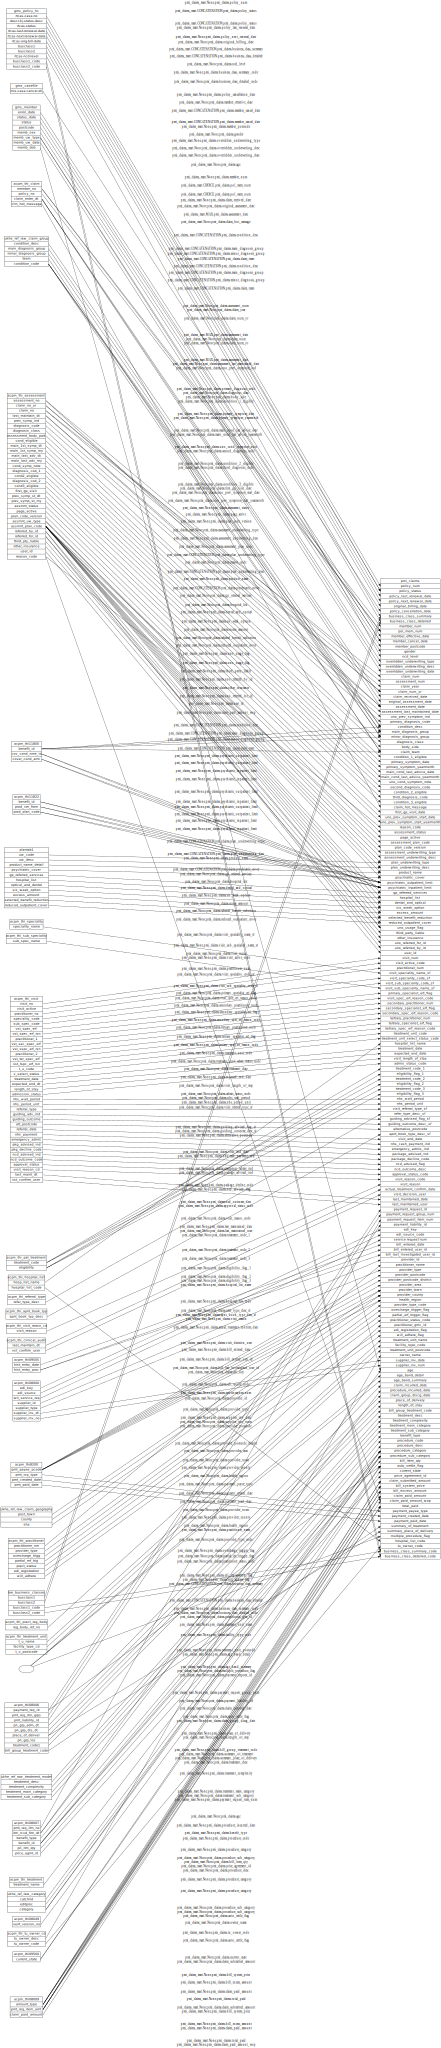

In [72]:
Source(dot_source)

In [36]:
results_df[results_df['s']==URIRef('http://www.tkltd.org/ontologies/640bc65273d94db9a5bdb07283f4a0e5')][['p','o']].values

array([[rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
        rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#DataMappingDetail')],
       [rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
        rdflib.term.Literal('pmi_claims_mart.CONCATENATION.pmi_claims.psychiatric_cover')],
       [rdflib.term.URIRef('http://www.tkltd.org/ontologies/serialization#UniqueIdentifier'),
        rdflib.term.Literal('pmi_claims_mart.CONCATENATION.pmi_claims.psychiatric_cover')],
       [rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#Applies'),
        rdflib.term.URIRef('http://www.tkltd.org/ontologies/0d60cc45d8cf4919b8e3a8f5212197fc')],
       [rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#MappingDetailSource'),
        rdflib.term.URIRef('http://www.tkltd.org/ontologies/d478526cf9ad4cddb85b18f65d0851c1')],
       [rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#MappingDetailSource'),
        

In [37]:
results_df[results_df['s']==URIRef('http://www.tkltd.org/ontologies/0d60cc45d8cf4919b8e3a8f5212197fc')][['p','o']].values

array([[rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
        rdflib.term.URIRef('http://www.tkltd.org/ontologies/datamapping#Translation')],
       [rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
        rdflib.term.Literal('CONCATENATION')],
       [rdflib.term.URIRef('http://www.tkltd.org/ontologies/serialization#UniqueIdentifier'),
        rdflib.term.Literal('CONCATENATION')]], dtype=object)

In [38]:
t_sparql = """SELECT ?fclass FROM <{graph}> WHERE {{@selfuri <http://www.tkltd.org/ontologies/datamapping#MappingDetailSource> ?fclass. ?fclass <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.tkltd.org/ontologies/datamodel#Class>}}"""
t_sparql=t_sparql.format(graph=graph_url_string).replace('@selfuri','<http://www.tkltd.org/ontologies/629eea2d951b47629cecbceec7d5e705>')
trs=repo.ds.query(t_sparql)
tresults_df = pd.DataFrame([r for r in trs])
#tresults_df.columns=['s','p','o']
tresults_df



,0
0,http://www.tkltd.org/ontologies/d478526cf9ad4c...
